In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv('Training Data.csv', sep=',')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Data Cleansing

## Handle Missing Value

In [ ]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 252000 non-null  int64 
 1   income             252000 non-null  int64 
 2   age                252000 non-null  int64 
 3   experience         252000 non-null  int64 
 4   married/single     252000 non-null  object
 5   house_ownership    252000 non-null  object
 6   car_ownership      252000 non-null  object
 7   profession         252000 non-null  object
 8   city               252000 non-null  object
 9   state              252000 non-null  object
 10  current_job_yrs    252000 non-null  int64 
 11  current_house_yrs  252000 non-null  int64 
 12  risk_flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df.isnull().sum()\
    .to_frame('missing value')\
    .style.map(lambda val : 'background-color: red' if val > 0 else '' )

,missing value
id,0
income,0
age,0
experience,0
married/single,0
house_ownership,0
car_ownership,0
profession,0
city,0
state,0


Dari data diatas tidak ada missing values

In [ ]:
columns_to_transform = ['profession', 'city', 'state']

for col in columns_to_transform:
    df[col] = df[col].str.replace('_', ' ').str.lower()

df.head()

,id,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,no,mechanical engineer,rewa,madhya pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,technical writer,alappuzha,kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,software developer,bhubaneswar,odisha,2,12,1
4,5,5768871,47,11,single,rented,no,civil servant,tiruchirappalli[10],tamil nadu,3,14,1


Dari syntax diatas, sudah dilakukan standarisasi untuk imputan pada fitur profession, city, state, dimana tulisan dibuat lower dan pemisah antar kata diganti dari yang tadinya menggunakan underscore (_) menjadi spasi ( )

## Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

Dari data diatas tidak ada Duplicated Data

## Handle Outliers

In [ ]:
df.describe()

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


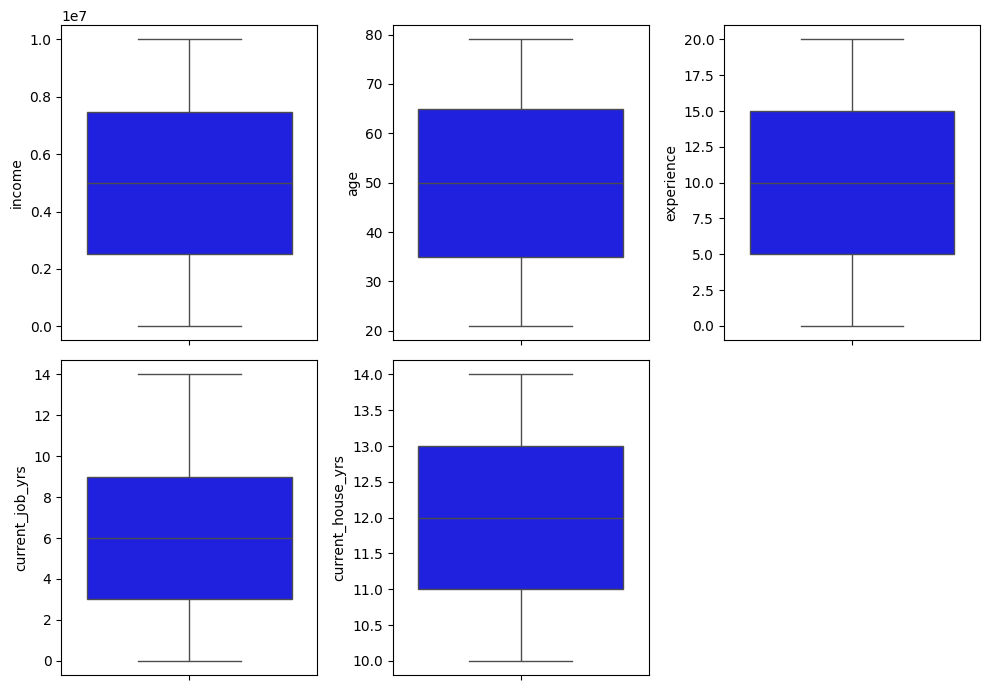

In [ ]:
# Analis Boxplot
nums = ['income', 'age', 'experience', 'current_job_yrs','current_house_yrs']

plt.figure(figsize=(10,7))

for i in range(0, len(nums)):
  plt.subplot(2,3, i+1)
  sns.boxplot(df[nums[i]], orient='v', color='blue')
  plt.tight_layout()

plt.show()

Berdasarkan tabel `desribe`, kolom income menunjukkan adanya outlier akan tetapi jika divisualisasi kan tidak adanya indikasi yang menunjukkan outlier. Kolom lain memiliki kemungkinan adanya outlier lebih kecil.

## **Feature Extraction**


### Membuat fitur baru berupa kategori risk_ratio berdasarkan city

In [ ]:
# Agregasi city berdasarkan risk_flag ratio yang gagal bayar

df_city_agg = df.groupby('city', as_index = False).agg({'id':'count',
                                                        'risk_flag': lambda x: (x==1).sum()})
# Mengganti Nama Kolom
df_city_agg.columns = ['city', 'total_customer', 'risk_flag']

# Menghitung Ratio
df_city_agg['risk_ratio'] = df_city_agg['risk_flag']/df_city_agg['total_customer']

df_city_agg.sort_values(by='risk_ratio', ascending=False)

,city,total_customer,risk_flag,risk_ratio
54,bhubaneswar,607,198,0.326194
112,gwalior,616,168,0.272727
41,bettiah[33],457,122,0.266958
160,kochi,961,243,0.252862
240,raiganj,718,172,0.239554
...,...,...,...,...
30,bangalore,727,27,0.037139
59,bijapur,572,20,0.034965
282,sultan pur majra,528,18,0.034091
78,dehradun,873,23,0.026346


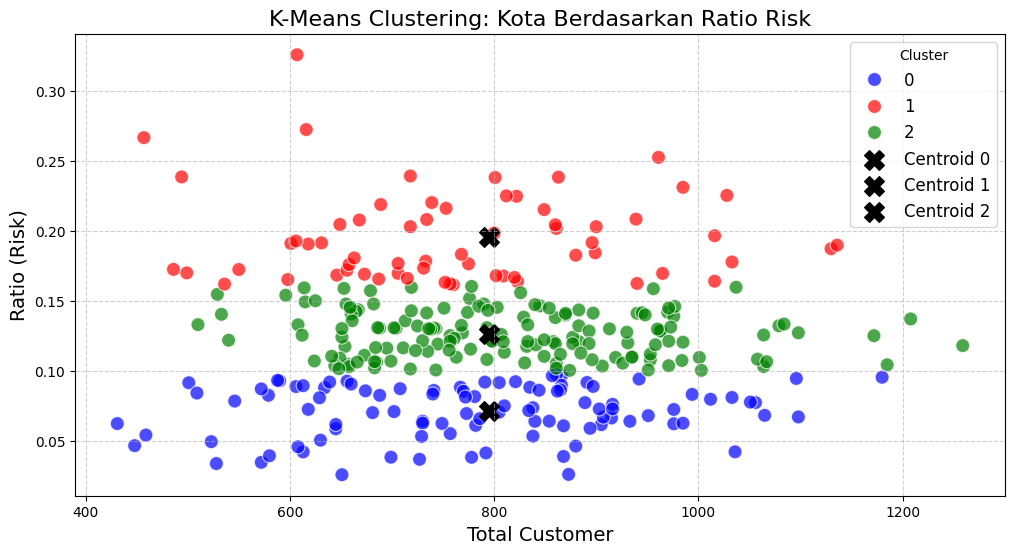

In [ ]:
# Mengkategorikan risk_ratio menggunakan K-Means clusterring

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Tambahkan n_init=10 untuk menghilangkan warning
df_city_agg['cluster'] = kmeans.fit_predict(df_city_agg[['risk_ratio']])


# Menyiapkan warna untuk setiap cluster
cluster_colors = {0: 'blue', 1: 'red', 2: 'green'}
df_city_agg['color'] = df_city_agg['cluster'].map(cluster_colors)

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='total_customer',
    y='risk_ratio',
    hue='cluster',
    palette=cluster_colors,
    data=df_city_agg,
    s=100,
    alpha=0.7
)

# Menandai pusat cluster
centroids = kmeans.cluster_centers_
for i, c in enumerate(centroids):
    plt.scatter(
        x=df_city_agg['total_customer'].mean(),
        y=c[0],
        color='black',
        marker='X',
        s=200,
        label=f'Centroid {i}'
    )

# Labeling dan tata letak
plt.title("K-Means Clustering: Kota Berdasarkan Ratio Risk", fontsize=16)
plt.xlabel("Total Customer", fontsize=14)
plt.ylabel("Ratio (Risk)", fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# Membuat kolom city category berdasarkan hasil dari K-Means clustering

df_city_agg['city_category'] = df_city_agg['cluster'].map({0: 'Low Risk', 1: 'High Risk', 2: 'Medium Risk'})

df_city_agg.sort_values(by='risk_ratio', ascending=False)


,city,total_customer,risk_flag,risk_ratio,cluster,color,city_category
54,bhubaneswar,607,198,0.326194,1,red,High Risk
112,gwalior,616,168,0.272727,1,red,High Risk
41,bettiah[33],457,122,0.266958,1,red,High Risk
160,kochi,961,243,0.252862,1,red,High Risk
240,raiganj,718,172,0.239554,1,red,High Risk
...,...,...,...,...,...,...,...
30,bangalore,727,27,0.037139,0,blue,Low Risk
59,bijapur,572,20,0.034965,0,blue,Low Risk
282,sultan pur majra,528,18,0.034091,0,blue,Low Risk
78,dehradun,873,23,0.026346,0,blue,Low Risk


In [ ]:
# Gabungkan category df_city_agg dengan df yang kita punya

df = df.merge(df_city_agg[['city','city_category']], on='city', how='left' )

df.head()

,id,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,city_category
0,1,1303834,23,3,single,rented,no,mechanical engineer,rewa,madhya pradesh,3,13,0,Medium Risk
1,2,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0,Medium Risk
2,3,3991815,66,4,married,rented,no,technical writer,alappuzha,kerala,4,10,0,Medium Risk
3,4,6256451,41,2,single,rented,yes,software developer,bhubaneswar,odisha,2,12,1,High Risk
4,5,5768871,47,11,single,rented,no,civil servant,tiruchirappalli[10],tamil nadu,3,14,1,Medium Risk


Fitur city_category terdiri dari 3 segment
1. Low Risk
2. Medium Risk
3. High Risk

Ketiga segmentasi diatas didapat dari K-Means clustering

### Risk_ratio Profession

In [ ]:
df_profession_agg = df.groupby('profession', as_index = False).agg({'id':'count',
                                                        'risk_flag': lambda x: (x==1).sum()})
# Mengganti Nama Kolom
df_profession_agg.columns = ['profession', 'total_customer', 'risk_flag']

# Menghitung Ratio
df_profession_agg['risk_ratio'] = df_profession_agg['risk_flag']/df_profession_agg['total_customer']

df_profession_agg.sort_values(by='risk_ratio', ascending=False)

,profession,total_customer,risk_flag,risk_ratio
38,police officer,5035,826,0.164052
7,chartered accountant,4493,690,0.153572
3,army officer,4661,709,0.152113
46,surveyor,4714,714,0.151464
43,software developer,5053,750,0.148427
41,scientist,4781,690,0.144321
26,geologist,4672,674,0.144264
10,civil engineer,4616,627,0.135832
35,official,4087,555,0.135796
24,firefighter,4507,612,0.135789


<Axes: xlabel='total_customer', ylabel='risk_ratio'>

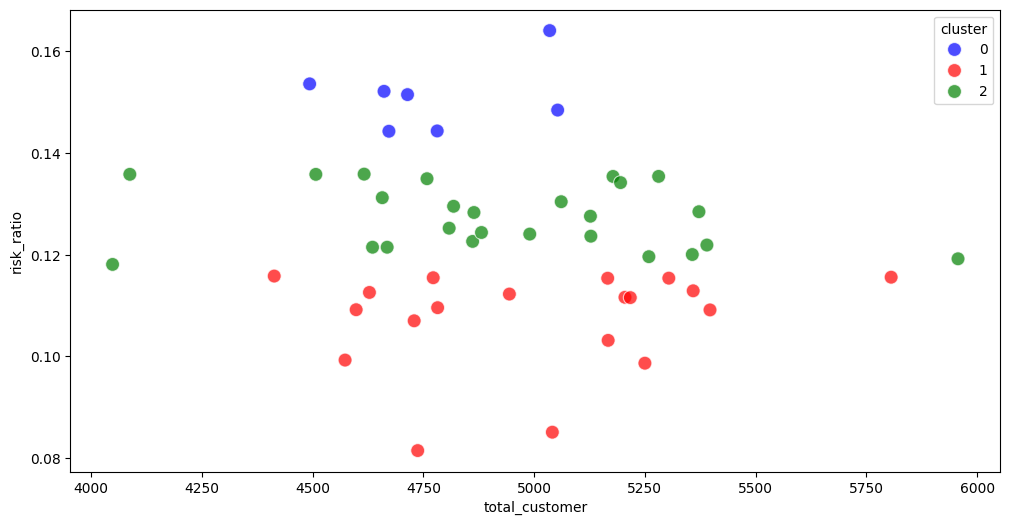

In [ ]:
# Mengkategorikan risk profession dengan menggunakan risk_ratio
df_profession_agg['cluster'] = kmeans.fit_predict(df_profession_agg[['risk_ratio']])
df_profession_agg['color'] = df_profession_agg['cluster'].map(cluster_colors)

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='total_customer',
    y='risk_ratio',
    hue='cluster',
    palette=cluster_colors,
    data=df_profession_agg,
    s=100,
    alpha=0.7
)


In [ ]:
# Membuat kolom city category berdasarkan hasil dari K-Means clustering

df_profession_agg['profession_category'] = df_profession_agg['cluster'].map({0: 'High Risk', 1: 'Low Risk', 2: 'Medium Risk'})

df_profession_agg.sort_values(by='risk_ratio', ascending=False)


,profession,total_customer,risk_flag,risk_ratio,cluster,color,profession_category
38,police officer,5035,826,0.164052,0,blue,High Risk
7,chartered accountant,4493,690,0.153572,0,blue,High Risk
3,army officer,4661,709,0.152113,0,blue,High Risk
46,surveyor,4714,714,0.151464,0,blue,High Risk
43,software developer,5053,750,0.148427,0,blue,High Risk
41,scientist,4781,690,0.144321,0,blue,High Risk
26,geologist,4672,674,0.144264,0,blue,High Risk
10,civil engineer,4616,627,0.135832,2,green,Medium Risk
35,official,4087,555,0.135796,2,green,Medium Risk
24,firefighter,4507,612,0.135789,2,green,Medium Risk


In [ ]:
df = df.merge(df_profession_agg[['profession','profession_category']], on='profession', how='left' )

df.head()

,id,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,city_category,profession_category
0,1,1303834,23,3,single,rented,no,mechanical engineer,rewa,madhya pradesh,3,13,0,Medium Risk,Low Risk
1,2,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0,Medium Risk,High Risk
2,3,3991815,66,4,married,rented,no,technical writer,alappuzha,kerala,4,10,0,Medium Risk,Medium Risk
3,4,6256451,41,2,single,rented,yes,software developer,bhubaneswar,odisha,2,12,1,High Risk,High Risk
4,5,5768871,47,11,single,rented,no,civil servant,tiruchirappalli[10],tamil nadu,3,14,1,Medium Risk,Low Risk


Fitur profession_category terdiri dari 3 segment
1. Low Risk
2. Medium Risk
3. High Risk

Ketiga segmentasi diatas didapat dari K-Means clustering

## Feature Transformation

### Split data


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['risk_flag','id'])
y = df['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Banyak data latih', X_train.shape[0])
print(f'Banyak data test', X_test.shape[0])

Banyak data latih 201600
Banyak data test 50400


### Encoding Feature Kategorikal


In [ ]:
# Ini hanya opsi jika terjadi error
import sklearn
!pip install scikit-learn --upgrade


In [ ]:
# install library target encoder
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

# memilih data yang akan di scale
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Pisahkan kolom berdasarkan kardinalitasnya
fitur_label_encoding = ['married/single', 'house_ownership', 'car_ownership', 'city_category', 'profession_category']
fitur_target_encoding = ['profession','city','state']

# Label encoding
le = LabelEncoder()

for i in fitur_label_encoding:
    le.fit(X_train[i])
    X_train_encoded[i] = le.transform(X_train[i])
    X_test_encoded[i] = le.transform(X_test[i])

#Target Encoding
te = TargetEncoder(cols=fitur_target_encoding, smoothing=3)
te.fit(X_train[fitur_target_encoding], y_train)
X_train_te = te.transform(X_train[fitur_target_encoding])
X_test_te = te.transform(X_test[fitur_target_encoding])


# Drop kolom asli karena datanya sudah diencoding
X_train_encoded[fitur_target_encoding] = X_train_te[fitur_target_encoding]
X_test_encoded[fitur_target_encoding]= X_test_te[fitur_target_encoding]

In [ ]:
X_train_encoded

,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,city_category,profession_category
200471,9121364,70,18,1,2,0,0.120873,0.236842,0.139313,3,11,0,2
92611,2636544,39,0,1,2,0,0.128980,0.078621,0.103837,0,11,1,2
86397,1010539,39,9,1,2,0,0.131487,0.155722,0.128364,4,13,2,2
110500,3897430,21,2,1,2,0,0.129292,0.192362,0.133547,2,12,0,2
185133,9470213,41,5,1,0,1,0.107390,0.114327,0.101142,5,13,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2357771,59,1,1,2,1,0.151531,0.220877,0.167524,1,12,0,0
103694,9314999,51,20,0,2,0,0.131046,0.124021,0.116077,7,10,2,2
131932,9013930,25,5,1,2,0,0.137370,0.148773,0.139313,5,10,2,2
146867,6660597,40,2,1,2,1,0.111748,0.096322,0.117185,2,14,2,1


In [ ]:
df['risk_flag'].value_counts()

,count
risk_flag,
0,221004
1,30996


In [ ]:
y_train.value_counts()

,count
risk_flag,
0,176857
1,24743


In [ ]:
y_test.value_counts()

,count
risk_flag,
0,44147
1,6253


### Handle Class Imbalance

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Misal X_train dan y_train adalah data yang sudah ada
# y_train adalah target

# Menampilkan distribusi awal
print("Distribusi awal:", Counter(y_train))

# Tentukan jumlah yang diinginkan untuk setiap kelas
target_count_0 = 120960
target_count_1 = 80640

# Menyeimbangkan kelas
# 1. Oversampling kelas minoritas (kelas 1) untuk mencapai 80.640
smote = SMOTE(sampling_strategy={1: target_count_1}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# 2. Undersampling kelas mayoritas (kelas 0) untuk mencapai 120.960
undersampler = RandomUnderSampler(sampling_strategy={0: target_count_0}, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Menampilkan distribusi setelah penyeimbangan
print("Distribusi setelah penyeimbangan:", Counter(y_train_resampled))


Distribusi awal: Counter({0: 176857, 1: 24743})
Distribusi setelah penyeimbangan: Counter({0: 120960, 1: 80640})


### Scaling Data

In [ ]:
#Menscaling dengan Minmaxscaler
from sklearn.preprocessing import MinMaxScaler

feature_to_scale = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']

mm = MinMaxScaler()

# memilih data yang akan di scale
X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test_encoded.copy()

# apply robustscaler pada fitur yang dipilih
X_train_scaled[feature_to_scale] = mm.fit_transform(X_train_resampled[feature_to_scale])
X_test_scaled[feature_to_scale] = mm.transform(X_test_encoded[feature_to_scale])

X_train_scaled.head()

,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,city_category,profession_category
88733,0.448802,0.396552,0.50,1,2,0,0.128980,0.169306,0.128089,0.500000,0.75,0,2
143236,0.864359,0.086207,0.55,0,2,0,0.131046,0.057692,0.128089,0.642857,0.00,1,2
5811,0.138849,0.517241,0.55,0,2,0,0.145655,0.173664,0.128089,0.714286,0.00,0,0
71750,0.539074,0.862069,0.50,1,2,0,0.077830,0.068750,0.128089,0.357143,0.00,1,1
156313,0.589498,0.293103,0.75,1,2,1,0.114323,0.078621,0.103837,0.928571,0.00,1,1


### Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train_scaled, y_train_resampled) # fit model decision tree dari data train

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train_resampled, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train_resampled, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train_resampled, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train_resampled, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))


eval_classification(dt)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.95
Precision (Test Set): 0.48
Precision (Train Set): 0.89
Recall (Test Set): 0.84
Recall (Train Set): 1.00
F1-Score (Test Set): 0.61
F1-Score (Train Set): 0.94
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.98


In [ ]:
import plotly.express as px

importance = dt.feature_importances_

# Buat DataFrame untuk visualisasi
fitur_penting = pd.DataFrame({
    'Fitur': X_train_resampled.columns,
    'Koefisien': importance
}).sort_values(by='Koefisien', ascending=True)  # Urutkan ascending untuk horizontal bar

# Plot Feature Importance dengan Plotly Express
fig = px.bar(
    fitur_penting,
    x='Koefisien',
    y='Fitur',
    orientation='h',
    text_auto=True
)

# Tambahkan styling ke layout
fig.update_layout(
    width=1200,
    height=600,
    title='<b>Feature Importance</b>',
    xaxis_title='',
    yaxis_title='',
    showlegend=False,
    paper_bgcolor='rgb(255, 255, 255, 1)',
    plot_bgcolor='rgb(255, 255, 255, 0)',
)

# Tampilkan plot
fig.show()

### Feature Selection

Memilih Fitur-fitur yang akan digunakan dalam modeling :     
1. Drop fitur profession_category dan city_category karena pengaruhnya sangat kecil
2. Drop fitur State karena pengaruhnya lebih kecil daripada City, dan State dan City memiliki kecenderungan multikolinearitan dengan State sehingga harus di drop salah satunya

In [ ]:
# Memilih fitur Training
X_train_selected = X_train_scaled.drop(columns=['city_category', 'profession_category', 'state' ])

# Memilih fitur testing
X_test_selected = X_test_scaled.drop(columns=['city_category', 'profession_category', 'state' ])

X_train_selected.head()

,income,age,experience,married/single,house_ownership,car_ownership,profession,city,current_job_yrs,current_house_yrs
88733,0.448802,0.396552,0.50,1,2,0,0.128980,0.169306,0.500000,0.75
143236,0.864359,0.086207,0.55,0,2,0,0.131046,0.057692,0.642857,0.00
5811,0.138849,0.517241,0.55,0,2,0,0.145655,0.173664,0.714286,0.00
71750,0.539074,0.862069,0.50,1,2,0,0.077830,0.068750,0.357143,0.00
156313,0.589498,0.293103,0.75,1,2,1,0.114323,0.078621,0.928571,0.00


# **Modeling**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test_selected)
    y_pred_train = model.predict(X_train_selected)
    y_pred_proba = model.predict_proba(X_test_selected)
    y_pred_proba_train = model.predict_proba(X_train_selected)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train_resampled, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train_resampled, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train_resampled, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train_resampled, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))
    #
    # score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    # print('recall (crossval train): '+ str(score['train_score'].mean()))
    # print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Build KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_selected, y_train_resampled)

KNeighborsClassifier()

In [ ]:
eval_classification(knn)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.65
Precision (Test Set): 0.26
Precision (Train Set): 0.81
Recall (Test Set): 0.09
Recall (Train Set): 0.18
F1-Score (Test Set): 0.14
F1-Score (Train Set): 0.29
roc_auc (test-proba): 0.59
roc_auc (train-proba): 0.63


## Tuning Hyperparameter KNN

### Neighbors

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Rentang nilai n_neighbors yang ingin diuji
k_range = range(1, 21)  # Mencoba n_neighbors dari 1 hingga 20
mean_scores = []

# Lakukan cross-validation untuk setiap nilai k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_selected, y_train_resampled, cv=5, scoring='recall')
    mean_scores.append(np.mean(scores))

# Menampilkan hasil
best_k = k_range[np.argmax(mean_scores)]
print(f"Best n_neighbors: {best_k}")

Best n_neighbors: 19


In [ ]:
# Tuning dengan RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score


# scoring = {
#     'roc_auc': 'roc_auc',
#     'recall': make_scorer(recall_score)
# }

knc = KNeighborsClassifier(n_neighbors=19)

# mendifinisikan parameter distribusi
param_dist = {
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' : ['minkowski', 'manhattan', 'euclidean'],
}


random_search = RandomizedSearchCV(estimator=knc, param_distributions=param_dist, n_iter=100, scoring='recall', refit='recall', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_selected, y_train_resampled)
eval_classification(random_search)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.



Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.53
Precision (Train Set): 0.93
Recall (Test Set): 0.57
Recall (Train Set): 0.77
F1-Score (Test Set): 0.55
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.98


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt_model = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt_model.fit(X_train_selected, y_train_resampled) # fit model decision tree dari data train

eval_classification(dt_model)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.95
Precision (Test Set): 0.47
Precision (Train Set): 0.89
Recall (Test Set): 0.86
Recall (Train Set): 1.00
F1-Score (Test Set): 0.61
F1-Score (Train Set): 0.94
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.98


## Tuning Hyperparameter

In [ ]:
 # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()

### max_depth

param value: 10; train recall: 0.542906746031746; test recall: 0.520390212697905; train precision: 0.6677037579306979; test precision: 0.2879900876183733
param value: 11; train recall: 0.613640873015873; test recall: 0.5819606588837358; train precision: 0.6850039452373372; test precision: 0.2996541501976285
param value: 12; train recall: 0.6649181547619047; test recall: 0.6241803934111626; train precision: 0.7079537352451873; test precision: 0.3169563098911808
param value: 14; train recall: 0.7638020833333333; test recall: 0.7033423956500879; train precision: 0.7539292009400705; test precision: 0.35628645495787425
param value: 15; train recall: 0.7911334325396825; test recall: 0.7297297297297297; train precision: 0.7807639118356158; test precision: 0.3843821076573162
param value: 17; train recall: 0.8544766865079365; test recall: 0.7724292339676955; train precision: 0.8154727386771128; test precision: 0.4154124021673691
param value: 18; train recall: 0.8843129960317461; test recall: 0.

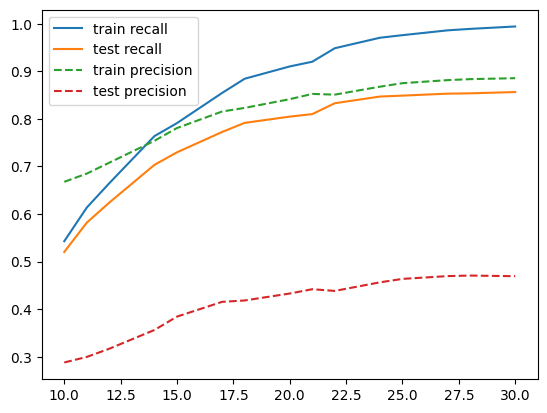

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score

param_values = [int(x) for x in np.linspace(10, 30, 15)]

train_scores_recall = []
test_scores_recall = []

train_scores_precision = []
test_scores_precision = []

for n in param_values:
    model = DecisionTreeClassifier(max_depth=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (precision)
    train_precision = precision_score(y_train_resampled, y_pred_train)
    train_scores_precision.append(train_precision)

    # Evaluasi on test (precision)
    test_precision = precision_score(y_test, y_pred)
    test_scores_precision.append(test_precision)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train precision: {train_precision}; test precision: {test_precision}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot Precision
plt.plot(param_values, train_scores_precision, label='train precision', linestyle='--')
plt.plot(param_values, test_scores_precision, label='test precision', linestyle='--')

plt.legend()
plt.show()


### min_samples_split

param value: 2; train recall: 0.9989459325396826; test recall: 0.8543099312330081; train precision: 0.887814931558181; test precision: 0.4672030785376946
param value: 5; train recall: 0.9837797619047619; test recall: 0.8515912362066208; train precision: 0.8802734071591842; test precision: 0.47069742773800055
param value: 9; train recall: 0.9725446428571428; test recall: 0.8503118503118503; train precision: 0.8712935085711746; test precision: 0.47132346423189436
param value: 12; train recall: 0.9696428571428571; test recall: 0.853190468575084; train precision: 0.8658560892963922; test precision: 0.4709569209039548
param value: 16; train recall: 0.9675099206349206; test recall: 0.8547897009435471; train precision: 0.8610338586500684; test precision: 0.4699727424602128
param value: 20; train recall: 0.9650421626984127; test recall: 0.8535103150487766; train precision: 0.8585344865628172; test precision: 0.4686512118018967
param value: 23; train recall: 0.961954365079365; test recall: 0.85

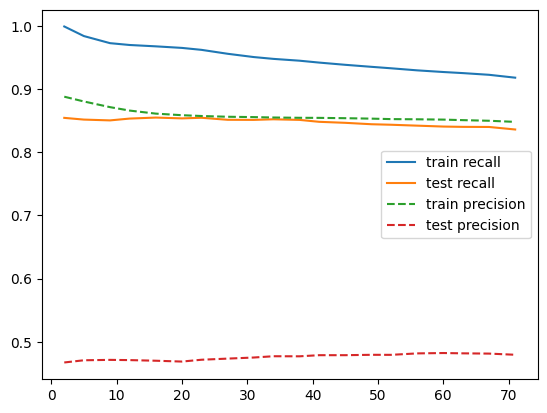

In [ ]:
# RECALL min_samples_split LEARNING CURVE

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

param_values = [int(x) for x in np.linspace(2, 71, 20 )]

train_scores_recall = []
test_scores_recall = []

train_scores_precision = []
test_scores_precision = []

for n in param_values:
    model = DecisionTreeClassifier(min_samples_split=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (precision)
    train_precision = precision_score(y_train_resampled, y_pred_train)
    train_scores_precision.append(train_precision)

    # Evaluasi on test (precision)
    test_precision = precision_score(y_test, y_pred)
    test_scores_precision.append(test_precision)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train precision: {train_precision}; test precision: {test_precision}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot Precision
plt.plot(param_values, train_scores_precision, label='train precision', linestyle='--')
plt.plot(param_values, test_scores_precision, label='test precision', linestyle='--')

plt.legend()
plt.show()



### min_samples_leaf

param value: 20; train recall: 0.8965773809523809; test recall: 0.8400767631536862; train precision: 0.8313020282389735; test precision: 0.4811320754716981
param value: 20; train recall: 0.8965773809523809; test recall: 0.83991683991684; train precision: 0.8313020282389735; test precision: 0.4809083417269481
param value: 21; train recall: 0.8928819444444445; test recall: 0.8392771469694547; train precision: 0.8304633164554042; test precision: 0.4818215203819317
param value: 22; train recall: 0.8900669642857143; test recall: 0.8371981448904526; train precision: 0.830546523333989; test precision: 0.48129079709478717
param value: 22; train recall: 0.8898809523809523; test recall: 0.8371981448904526; train precision: 0.8305843952915032; test precision: 0.4816450455423682
param value: 23; train recall: 0.887983630952381; test recall: 0.835918758995682; train precision: 0.8297546900891088; test precision: 0.4802462330025726
param value: 24; train recall: 0.8852058531746032; test recall: 0.83

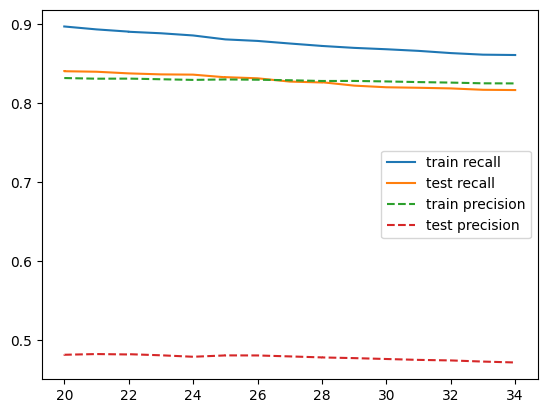

In [ ]:
# RECALL min_samples_leaf LEARNING CURVE

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

param_values = [int(x) for x in np.linspace(20, 34, 20)]

train_scores_recall = []
test_scores_recall = []

train_scores_precision = []
test_scores_precision = []

for n in param_values:
    model = DecisionTreeClassifier(min_samples_leaf=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (precision)
    train_precision = precision_score(y_train_resampled, y_pred_train)
    train_scores_precision.append(train_precision)

    # Evaluasi on test (precision)
    test_precision = precision_score(y_test, y_pred)
    test_scores_precision.append(test_precision)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train precision: {train_precision}; test precision: {test_precision}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot Precision
plt.plot(param_values, train_scores_precision, label='train precision', linestyle='--')
plt.plot(param_values, test_scores_precision, label='test precision', linestyle='--')

plt.legend()
plt.show()



### max_features

param value: 0.01; train recall: 0.9989459325396826; test recall: 0.8600671677594754; train precision: 0.887814931558181; test precision: 0.4684260952878669
param value: 0.06210526315789474; train recall: 0.9989459325396826; test recall: 0.8562290100751639; train precision: 0.887814931558181; test precision: 0.46719022687609074
param value: 0.11421052631578947; train recall: 0.9989459325396826; test recall: 0.8589477051015513; train precision: 0.887814931558181; test precision: 0.46891915488039115
param value: 0.16631578947368422; train recall: 0.9989459325396826; test recall: 0.8578282424436271; train precision: 0.887814931558181; test precision: 0.46696265343431703
param value: 0.21842105263157896; train recall: 0.9989459325396826; test recall: 0.8562290100751639; train precision: 0.887814931558181; test precision: 0.4675574185660641
param value: 0.2705263157894737; train recall: 0.9989459325396826; test recall: 0.848072924996002; train precision: 0.887814931558181; test precision: 0

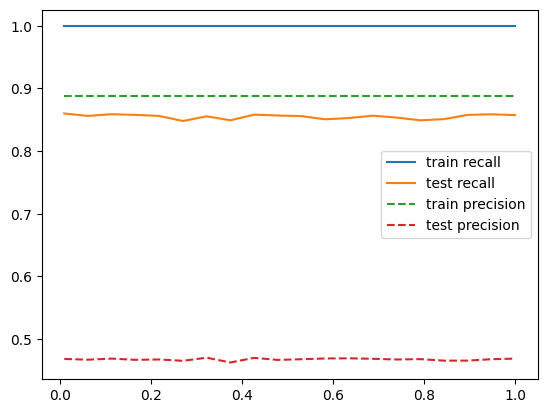

In [ ]:
# RECALL max_features LEARNING CURVE

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

param_values = [float(x) for x in np.linspace(0.01, 1, 20)]

train_scores_recall = []
test_scores_recall = []

train_scores_precision = []
test_scores_precision = []

for n in param_values:
    model = DecisionTreeClassifier(max_features=n)
    model.fit(X_train_selected, y_train_resampled)
# Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (precision)
    train_precision = precision_score(y_train_resampled, y_pred_train)
    train_scores_precision.append(train_precision)

    # Evaluasi on test (precision)
    test_precision = precision_score(y_test, y_pred)
    test_scores_precision.append(test_precision)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train precision: {train_precision}; test precision: {test_precision}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot Precision
plt.plot(param_values, train_scores_precision, label='train precision', linestyle='--')
plt.plot(param_values, test_scores_precision, label='test precision', linestyle='--')

plt.legend()
plt.show()


### max_leaf_nodes

param value: 1200; train recall: 0.8690848214285715; test recall: 0.8183272029425875; train precision: 0.8251077256351692; test precision: 0.47217864722709235
param value: 1221; train recall: 0.8715773809523809; test recall: 0.8207260514952822; train precision: 0.8254042818052636; test precision: 0.47277752187931826
param value: 1242; train recall: 0.8724082341269841; test recall: 0.820566128258436; train precision: 0.8268708642352581; test precision: 0.47509259259259257
param value: 1263; train recall: 0.873623511904762; test recall: 0.8210458979689749; train precision: 0.8278670223392129; test precision: 0.4765617748073888
param value: 1284; train recall: 0.8756076388888889; test recall: 0.822645130337438; train precision: 0.8281609195402299; test precision: 0.47771173848439824
param value: 1305; train recall: 0.8774429563492063; test recall: 0.8239245162322085; train precision: 0.8281871810478019; test precision: 0.47721378288254906
param value: 1326; train recall: 0.879327876984127

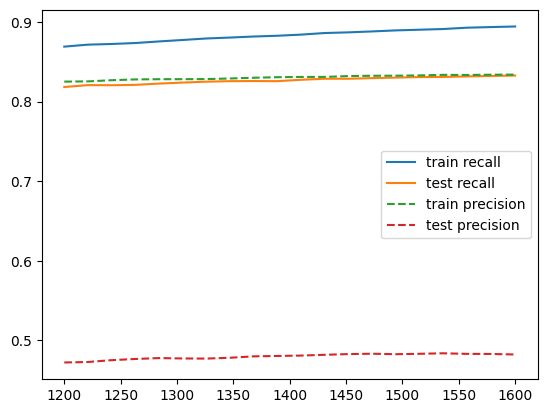

In [ ]:
# RECALL max_leaf_nodes LEARNING CURVE

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

param_values = [int(x) for x in np.linspace(1200, 1600, 20)]

train_scores_recall = []
test_scores_recall = []

train_scores_precision = []
test_scores_precision = []


for n in param_values:
    model = DecisionTreeClassifier(max_leaf_nodes=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (precision)
    train_precision = precision_score(y_train_resampled, y_pred_train)
    train_scores_precision.append(train_precision)

    # Evaluasi on test (precision)
    test_precision = precision_score(y_test, y_pred)
    test_scores_precision.append(test_precision)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train precision: {train_precision}; test precision: {test_precision}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot Precision
plt.plot(param_values, train_scores_precision, label='train precision', linestyle='--')
plt.plot(param_values, test_scores_precision, label='test precision', linestyle='--')

plt.legend()
plt.show()


### Random Search

#### Percobaan 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, make_scorer

dt = DecisionTreeClassifier(random_state=42)

# Mendefinisikan parameter grid yang akan dicoba
param_dist = {
    'max_depth': [17, 18, 19, 20, 21, 22],
    'min_samples_split': [int(x) for x in np.linspace(31, 71, 29)],
    'min_samples_leaf': [int(x) for x in np.linspace(20, 34, 13)],
    'max_features': [80, 83, 86, 100],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [None, 1200, 1284, 1410, 1547, 1531]
}

# RandomizedSearchCV untuk tuning hyperparameter
random_search_dt = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_dist,
                                   n_iter=100,  # Jumlah kombinasi yang diuji
                                   scoring='recall',
                                   cv=5,  # Validasi silang dengan 5 fold
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)


random_search_dt.fit(X_train_selected, y_train_resampled)
eval_classification(random_search_dt)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.86
Precision (Test Set): 0.45
Precision (Train Set): 0.81
Recall (Test Set): 0.79
Recall (Train Set): 0.84
F1-Score (Test Set): 0.57
F1-Score (Train Set): 0.82
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.91


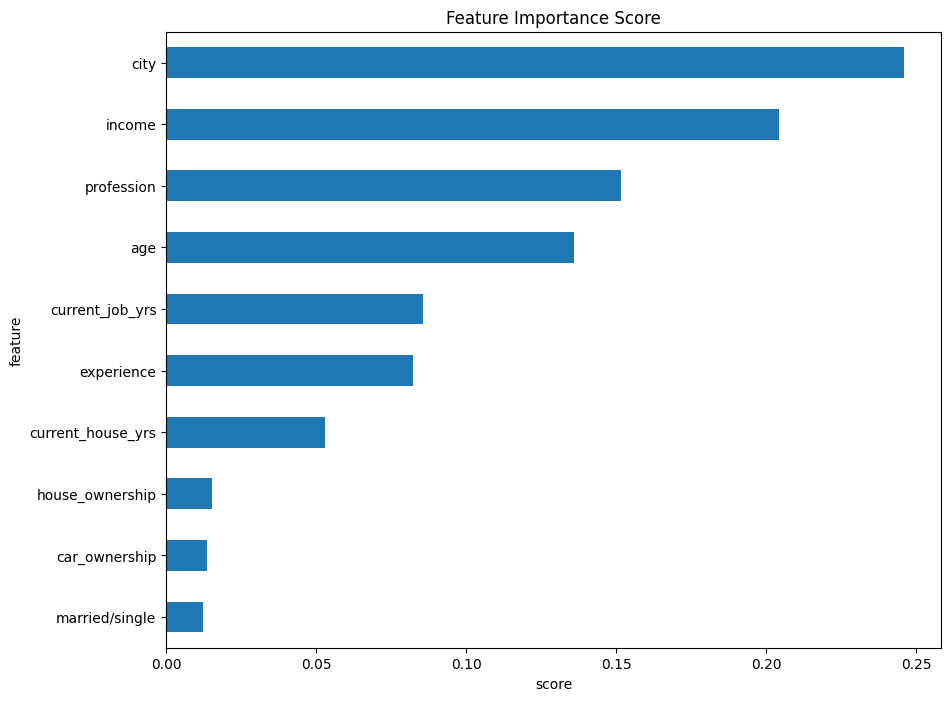

In [ ]:
def show_feature_importance(random_search_model):
    # Ambil model terbaik yang ditemukan oleh RandomizedSearchCV
    best_model = random_search_model.best_estimator_

    # Ambil feature importances dari model terbaik
    feat_importances = pd.Series(best_model.feature_importances_, index=X_train_selected.columns)

    # Plot feature importances
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('Feature Importance Score')

# Panggil fungsi dengan objek RandomizedSearchCV
show_feature_importance(random_search_dt)

#### Percobaan 2 (Model yang dipakai)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

# ==== 5. Hyperparameter Tuning ====
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [20, 21, 22, 24, 25, 26, 27],
    'min_samples_split': [20, 22, 25, 28, 31, 46],
    'min_samples_leaf': [20, 21, 22, 23, 24, 25, 26, 27],
    'max_features': [1, 80, 83, 86, 100],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [930, 931, 932, 934, 935]
}

scoring = {
    'recall': make_scorer(recall_score, average='macro', zero_division=1),
    'precision': 'precision_macro'
}

random_search_dt2 = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring=scoring,
    cv=5,
    refit='recall',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Latih model terbaik dengan data yang sudah di-resample
random_search_dt2.fit(X_train_selected, y_train_resampled)
best_model_dt2 = random_search_dt2.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
eval_classification(best_model_dt2)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.85
Precision (Test Set): 0.44
Precision (Train Set): 0.80
Recall (Test Set): 0.80
Recall (Train Set): 0.84
F1-Score (Test Set): 0.57
F1-Score (Train Set): 0.82
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.89


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_selected, y_train_resampled)

LogisticRegression()

In [ ]:
# Evaluasi Model Logistic Regression
eval_classification(lr)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.63
Precision (Test Set): 0.22
Precision (Train Set): 0.57
Recall (Test Set): 0.27
Recall (Train Set): 0.27
F1-Score (Test Set): 0.24
F1-Score (Train Set): 0.37
roc_auc (test-proba): 0.63
roc_auc (train-proba): 0.64


## Tuning Logistic regression

In [ ]:
# Tuning dengan GridSearch
# Mendefinisikan parameter yang akan diuji
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced', None]
}

gs = GridSearchCV(lr, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train_resampled, y_train_resampled)
eval_classification(gs)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

Accuracy (Test Set): 0.59
Accuracy (Train Set): 0.59
Precision (Test Set): 0.17
Precision (Train Set): 0.12
Recall (Test Set): 0.59
Recall (Train Set): 0.48
F1-Score (Test Set): 0.26
F1-Score (Train Set): 0.19
roc_auc (test-proba): 0.63
roc_auc (train-proba): 0.64


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_selected, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
eval_classification(rf_model)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.95
Precision (Test Set): 0.51
Precision (Train Set): 0.89
Recall (Test Set): 0.81
Recall (Train Set): 1.00
F1-Score (Test Set): 0.62
F1-Score (Train Set): 0.94
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.97


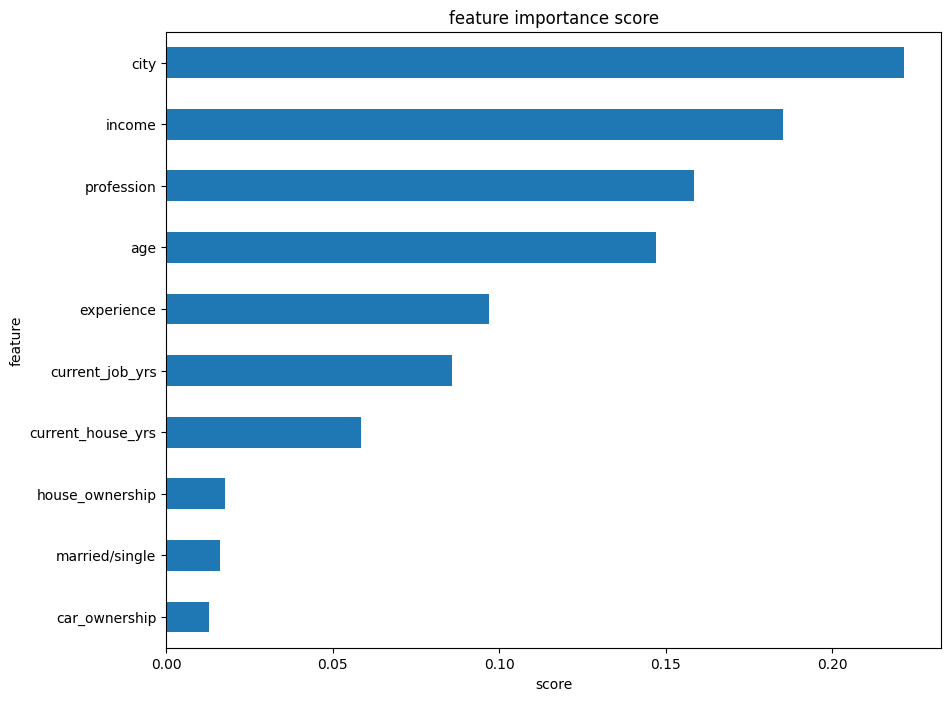

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train_selected.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

show_feature_importance(rf_model)

## **Tuning Hyperparameter (Coba-coba tanpa learning Curve)**

In [ ]:
# Tuning dengan RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression(solver='saga' )
rs = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train_selected, y_train_resampled)
eval_classification(rs)

Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.63
Precision (Test Set): 0.23
Precision (Train Set): 0.12
Recall (Test Set): 0.25
Recall (Train Set): 0.18
F1-Score (Test Set): 0.24
F1-Score (Train Set): 0.15
roc_auc (test-proba): 0.63
roc_auc (train-proba): 0.64


## Learning Curve

#### n_estimator

param value: 1; train: 0.9488413277546985; test: 0.8503459055896628
param value: 5; train: 0.9712468996990675; test: 0.9253939172463126
param value: 9; train: 0.9719146628046231; test: 0.933805181445495
param value: 13; train: 0.9720159586096446; test: 0.9363217780864419
param value: 17; train: 0.9721689275150646; test: 0.9372127631936208
param value: 21; train: 0.9722146970646862; test: 0.9376362697888162
param value: 25; train: 0.9722273089978418; test: 0.9379304724680575
param value: 29; train: 0.9722860529905925; test: 0.9379105413821598
param value: 33; train: 0.9721796962961978; test: 0.9377344671554052
param value: 37; train: 0.972269633267442; test: 0.9384650707773979
param value: 41; train: 0.9723034235335241; test: 0.937973623884854
param value: 45; train: 0.9723143982769128; test: 0.93805968400984
param value: 49; train: 0.9722686485136107; test: 0.9382549720642211
param value: 53; train: 0.9724026933424796; test: 0.9378779822036704
param value: 57; train: 0.9724308707013862

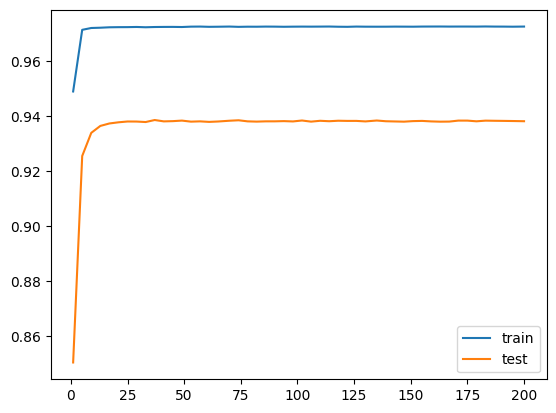

In [ ]:
import matplotlib.pyplot as plt

param_values = [int(x) for x in np.linspace(1, 200, 50)]

train_scores = []
test_scores = []

for n in param_values:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train_selected, y_train_resampled)

    # evaluasi on train
    y_pred_train_proba = model.predict_proba(X_train_selected)
    train_auc = roc_auc_score(y_train_resampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # evaluasi on test
    y_pred_proba = model.predict_proba(X_test_selected)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='train')
plt.plot(param_values, test_scores, label='test')
plt.legend()
plt.show()

Interpretasi : n_estimastors dari nilai ROC_AUC nya hampir sama disetiap iterasi kita bisa pakai 25-60

n_estimators menentukan berapa jumlah pohon yang membentuk random forest, semakin tinggi nilainya akan cenderung akurasi tetapi juga lambat karena membutuhkan banyak sumber daya komputasi

param value: 1; train: 0.9699280753968254; test: 0.845034383495922
param value: 5; train: 0.9928571428571429; test: 0.820086358547897
param value: 9; train: 0.9965029761904762; test: 0.8090516552055014
param value: 13; train: 0.9982514880952381; test: 0.7991364145210299
param value: 17; train: 0.9987227182539683; test: 0.7919398688629458
param value: 21; train: 0.9989707341269841; test: 0.7895410203102511
param value: 25; train: 0.999280753968254; test: 0.7861826323364784
param value: 29; train: 0.9992435515873016; test: 0.7898608667839437
param value: 33; train: 0.9993675595238095; test: 0.7847433232048616
param value: 37; train: 0.9989087301587302; test: 0.7853830161522469
param value: 41; train: 0.9989459325396826; test: 0.7844234767311691
param value: 45; train: 0.9992931547619047; test: 0.7817047817047817
param value: 49; train: 0.9991443452380953; test: 0.7813849352310891
param value: 53; train: 0.9989335317460317; test: 0.7788261634415481
param value: 57; train: 0.99909474206349

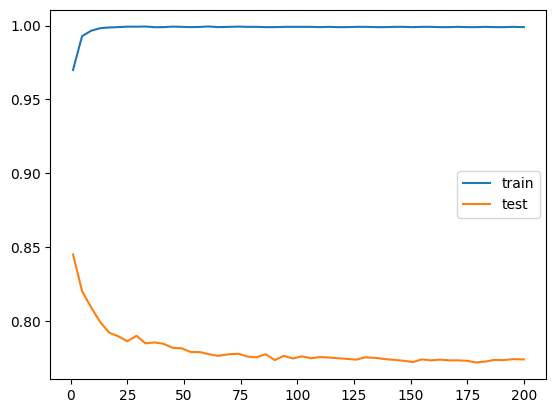

In [ ]:
# RECALL n_estimator LEARNING CURVE

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

param_values = [int(x) for x in np.linspace(1, 200, 50)]

train_scores = []
test_scores = []

for n in param_values:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train_selected, y_train_resampled)

    # evaluasi on train
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores.append(train_recall)

    # evaluasi on test
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)

    print('param value: ' + str(n) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='train')
plt.plot(param_values, test_scores, label='test')
plt.legend()
plt.show()


#### max_depth

param value: 2; train: 0.6325885848890096; test: 0.6136758181927207
param value: 4; train: 0.6640841108639153; test: 0.637473741238088
param value: 6; train: 0.7128234599805393; test: 0.6738728234648335
param value: 8; train: 0.7919287262642085; test: 0.7417794205423298
param value: 10; train: 0.8757091869951106; test: 0.8164409640239516
param value: 12; train: 0.9335948026219312; test: 0.8735906866636196
param value: 14; train: 0.9555559687103042; test: 0.9042636534033284
param value: 16; train: 0.9619390584648211; test: 0.9229957877631472
param value: 18; train: 0.964467684142764; test: 0.9335243168720834
param value: 20; train: 0.9663526328681067; test: 0.936965377917895
param value: 22; train: 0.9683605603337978; test: 0.9381351681978435
param value: 24; train: 0.9698611918967047; test: 0.9380922033406478
param value: 26; train: 0.9711384125409424; test: 0.9382579063026031
param value: 28; train: 0.9717395412182042; test: 0.9379517384512932
param value: 30; train: 0.972122199815497

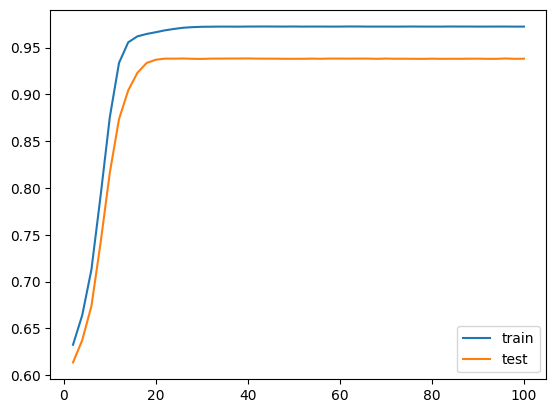

In [ ]:
param_values = [int(x) for x in np.linspace(2, 100, 50)]

train_scores = []
test_scores = []

for n in param_values:
    model = RandomForestClassifier(n_estimators=60, max_depth=n)
    model.fit(X_train_selected, y_train_resampled)

    # evaluasi on train
    y_pred_train_proba = model.predict_proba(X_train_selected)
    train_auc = roc_auc_score(y_train_resampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # evaluasi on test
    y_pred_proba = model.predict_proba(X_test_selected)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='train')
plt.plot(param_values, test_scores, label='test')
plt.legend()
plt.show()

Interpretasi : max_depth dari nilai ROC_AUC berdasarkan hasil diatas kita bisa pakai dari 2-20 dari segi perbedaan nilai yang lebih kecil

max_depth adalah hyperparameter penting yang mengontrol kompleksitas kedalaman pohon keputusan. Nilai yang terlalu kecil menyebabkan underfitting, sedangkan nilai yang terlalu besar menyebabkan overfitting.

param value: 2; train: 0.0; test: 0.0
param value: 2; train: 0.011297123015873016; test: 0.0
param value: 2; train: 0.01899801587301587; test: 0.017271709579401887
param value: 3; train: 0.1996155753968254; test: 0.17671517671517672
param value: 3; train: 0.060714285714285714; test: 0.03822165360626899
param value: 4; train: 0.14990079365079365; test: 0.13865344634575405
param value: 4; train: 0.21805555555555556; test: 0.20022389253158485
param value: 5; train: 0.20100446428571428; test: 0.18519110826803134
param value: 5; train: 0.18937251984126985; test: 0.18391172237326084
param value: 6; train: 0.2916046626984127; test: 0.2517191747960979
param value: 6; train: 0.2532862103174603; test: 0.23172877019030866
param value: 7; train: 0.26788194444444446; test: 0.23172877019030866
param value: 7; train: 0.29136904761904764; test: 0.26083479929633774
param value: 8; train: 0.3174231150793651; test: 0.25491763953302415
param value: 8; train: 0.37336309523809524; test: 0.3204861666400128
p

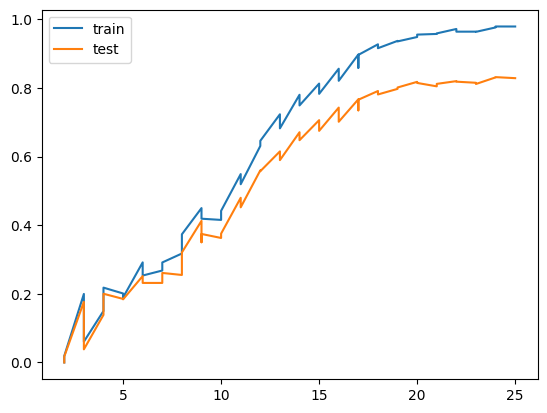

In [ ]:
# RECALL LEARNING CURVE MAX DEPTH

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

param_values = [int(x) for x in np.linspace(2, 25, 50)]

train_scores = []
test_scores = []

for n in param_values:
    model = RandomForestClassifier(n_estimators=3, max_depth=n)
    model.fit(X_train_selected, y_train_resampled)

    # evaluasi on train
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores.append(train_recall)

    # evaluasi on test
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)

    print('param value: ' + str(n) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='train')
plt.plot(param_values, test_scores, label='test')
plt.legend()
plt.show()


#### min_samples_split

param value: 2; train: 0.9723017919310857; test: 0.9379001701173606
param value: 7; train: 0.9680663915896701; test: 0.9381282691151295
param value: 12; train: 0.9667896685764874; test: 0.9380917849399897
param value: 17; train: 0.9652490002680277; test: 0.9377898626780422
param value: 22; train: 0.9638892962000096; test: 0.9380399539736093
param value: 27; train: 0.9631618185468631; test: 0.9380949292843297
param value: 32; train: 0.9627210588071553; test: 0.9380464092980494
param value: 37; train: 0.9621650080810199; test: 0.9379352089084085
param value: 42; train: 0.9618590189077656; test: 0.9381616560386439
param value: 47; train: 0.9616304862029688; test: 0.9381371171117316
param value: 52; train: 0.9612137129157218; test: 0.9382427134683147
param value: 57; train: 0.9610713947398982; test: 0.9377965462210232
param value: 62; train: 0.9607871363787124; test: 0.9375229339256863
param value: 68; train: 0.9605068400998035; test: 0.9374593515157121
param value: 73; train: 0.9602817356

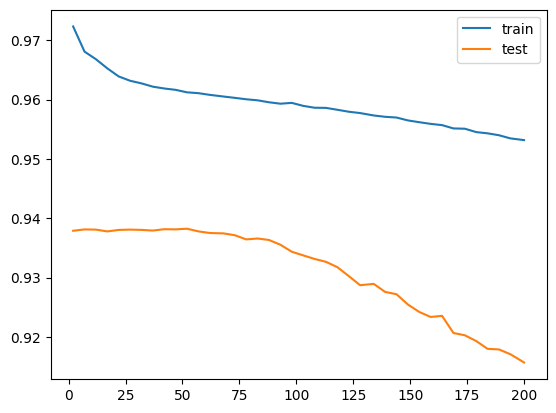

In [ ]:
param_values = [int(x) for x in np.linspace(2, 200, 40)]

train_scores = []
test_scores = []

for n in param_values:
    model = RandomForestClassifier(n_estimators=60, min_samples_split=n)
    model.fit(X_train_selected, y_train_resampled)

    # evaluasi on train
    y_pred_train_proba = model.predict_proba(X_train_selected)
    train_auc = roc_auc_score(y_train_resampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # evaluasi on test
    y_pred_proba = model.predict_proba(X_test_selected)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='train')
plt.plot(param_values, test_scores, label='test')
plt.legend()
plt.show()

Interpretasi : min_samples_split dari nilai ROC_AUC diatas yang dapat kita gunakan sekitar rentang 50-100

min_samples_split mengontrol kompleksitas pohon keputusan dengan membatasi jumlah minimum sampel untuk pemisahan node.

param value: 2; train: 0.9867683531746032; test: 0.825683671837518
param value: 2; train: 0.9861855158730158; test: 0.83383975691668
param value: 2; train: 0.9872891865079365; test: 0.8284023668639053
param value: 3; train: 0.9798983134920635; test: 0.8210458979689749
param value: 3; train: 0.9796502976190476; test: 0.825683671837518
param value: 4; train: 0.9767857142857143; test: 0.8220054373900528
param value: 4; train: 0.9774553571428571; test: 0.819606588837358
param value: 5; train: 0.9756696428571429; test: 0.8260035183112107
param value: 5; train: 0.9763392857142857; test: 0.8248840556532864
param value: 6; train: 0.974578373015873; test: 0.8274428274428275
param value: 6; train: 0.9730530753968254; test: 0.8258435950743643
param value: 7; train: 0.9741319444444444; test: 0.8236046697585159
param value: 7; train: 0.9733878968253968; test: 0.8237645929953622
param value: 8; train: 0.9736855158730159; test: 0.8269630577322885
param value: 8; train: 0.9737847222222222; test: 0.823

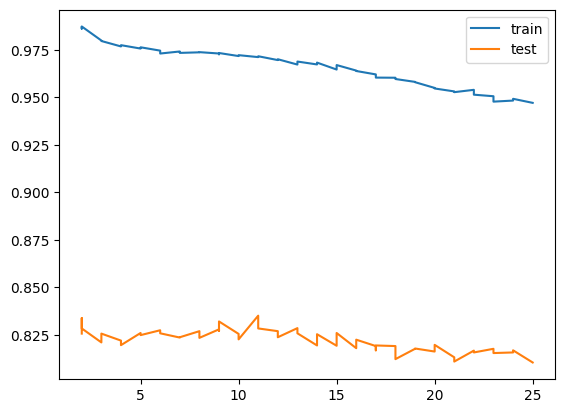

In [ ]:
 # RECALL LEARNING CURVE MIN SAMPLE SPLIT

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

param_values = [int(x) for x in np.linspace(2, 25, 50)]

train_scores = []
test_scores = []

for n in param_values:
    model = RandomForestClassifier(n_estimators=3, min_samples_split=n)
    model.fit(X_train_selected, y_train_resampled)

    # evaluasi on train
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores.append(train_recall)

    # evaluasi on test
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)

    print('param value: ' + str(n) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='train')
plt.plot(param_values, test_scores, label='test')
plt.legend()
plt.show()


#### min_samples_leaf

param value: 1; train: 0.9723293465847953; test: 0.9380092495235783
param value: 1; train: 0.9724137323657761; test: 0.9380690844402116
param value: 2; train: 0.966946704083109; test: 0.9379299779945525
param value: 3; train: 0.9644195628917076; test: 0.9380328647087779
param value: 4; train: 0.9628483822336322; test: 0.9378989583855843
param value: 5; train: 0.9618223689034352; test: 0.9379642216432242
param value: 6; train: 0.9611161575451941; test: 0.9381013846087699
param value: 7; train: 0.9605110732444019; test: 0.9378072797374746
param value: 8; train: 0.9598165639049312; test: 0.9379286485309893
param value: 9; train: 0.9596335086708777; test: 0.9379322094647292
param value: 9; train: 0.9594629072332057; test: 0.9379784146629528
param value: 10; train: 0.9592655858579446; test: 0.937715840175455
param value: 11; train: 0.9591242095314206; test: 0.9375167539125016
param value: 12; train: 0.9586838128142846; test: 0.9373740919668773
param value: 13; train: 0.958500509174783; test

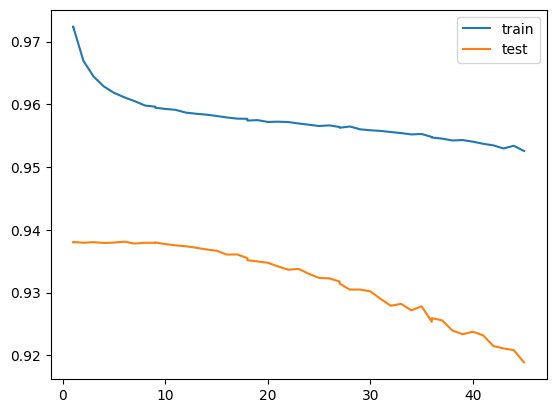

In [ ]:
param_values = [int(x) for x in np.linspace(1, 45, 50)]

train_scores = []
test_scores = []

for n in param_values:
    model = RandomForestClassifier(n_estimators=60, min_samples_leaf=n)
    model.fit(X_train_selected, y_train_resampled)

    # evaluasi on train
    y_pred_train_proba = model.predict_proba(X_train_selected)
    train_auc = roc_auc_score(y_train_resampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # evaluasi on test
    y_pred_proba = model.predict_proba(X_test_selected)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='train')
plt.plot(param_values, test_scores, label='test')
plt.legend()
plt.show()

Interpretasi : min_samples_leaf dari nilai ROC_AUC diatas yang dapat digunakan sekitar 2-30

min_samples_leaf: Mengatur jumlah sampel minimum agar sebuah node bisa menjadi daun setelah pembagian.

param value: 1; train: 0.9859250992063492; test: 0.8330401407324485
param value: 1; train: 0.9864583333333333; test: 0.8280825203902127
param value: 2; train: 0.9665922619047619; test: 0.8255237486006717
param value: 3; train: 0.9543774801587301; test: 0.8218455141532065
param value: 4; train: 0.943328373015873; test: 0.8173676635215097
param value: 5; train: 0.934796626984127; test: 0.8168878938109707
param value: 6; train: 0.9273685515873016; test: 0.8100111946265792
param value: 7; train: 0.9218377976190476; test: 0.8122501199424277
param value: 8; train: 0.9161706349206349; test: 0.8111306572845034
param value: 9; train: 0.9097594246031746; test: 0.8044138813369582
param value: 9; train: 0.9080729166666667; test: 0.8020150327842636
param value: 10; train: 0.9036706349206349; test: 0.8056932672317287
param value: 11; train: 0.901438492063492; test: 0.7994562609947226
param value: 12; train: 0.9008804563492063; test: 0.8024948024948025
param value: 13; train: 0.89609375; test: 0.7991

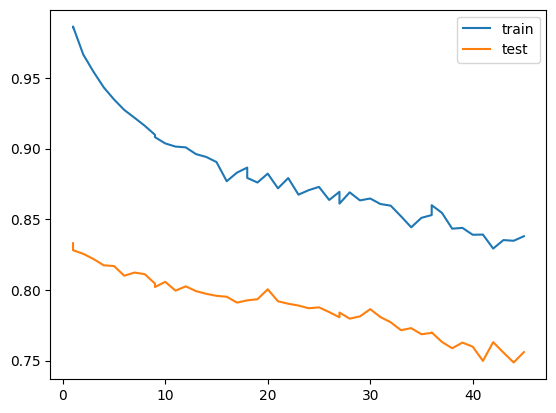

In [ ]:
 # RECALL LEARNING CURVE MIN SAMPLE SPLIT

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

param_values = [int(x) for x in np.linspace(1, 45, 50)]

train_scores = []
test_scores = []

for n in param_values:
    model = RandomForestClassifier(n_estimators=3, min_samples_leaf=n)
    model.fit(X_train_selected, y_train_resampled)

    # evaluasi on train
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores.append(train_recall)

    # evaluasi on test
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)

    print('param value: ' + str(n) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='train')
plt.plot(param_values, test_scores, label='test')
plt.legend()
plt.show()


### Tuning RandomizedSearch

#### Percobaan 1

In [ ]:
# Tuning dengan RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score
from scipy.stats import randint

scoring = {
    'roc_auc': 'roc_auc',
    'recall': make_scorer(recall_score)
}

rfs = RandomForestClassifier(random_state=42)

# mendifinisikan parameter distribusi
param_dist = {
    'n_estimators' : [25, 33, 49, 57, 60],
    'max_depth' : [2, 8, 12, 18, 20],
    'min_samples_split' : [52, 62, 73, 83, 93, 100],
    'min_samples_leaf' : [3, 8, 10, 15, 20, 25, 30],
    'max_features' : ['auto', 'sqrt', 'log2', None],
}

random_search = RandomizedSearchCV(estimator=rfs, param_distributions=param_dist, n_iter=100, scoring=scoring, refit='recall', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_selected, y_train_resampled)
eval_classification(random_search)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.91
Precision (Test Set): 0.55
Precision (Train Set): 0.88
Recall (Test Set): 0.76
Recall (Train Set): 0.90
F1-Score (Test Set): 0.64
F1-Score (Train Set): 0.89
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.96


#### Percobaan 2

In [ ]:
# Tuning dengan RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score
from scipy.stats import randint

scoring = {
    'roc_auc': 'roc_auc',
    'recall': make_scorer(recall_score)
}

rfs = RandomForestClassifier(random_state=42)

# mendifinisikan parameter distribusi
param_dist = {
    'n_estimators' : [1,2,3,4,5],
    'max_depth' : [13,14,15,16,17,18,19,20,21,22,23],
    'min_samples_split' : [2,6,9,25],
    'min_samples_leaf' : [5,6,7,8,9,10],
    'max_features' : ['auto', 'sqrt', 'log2', None],
}

scoring = {
    'recall': make_scorer(recall_score),
    'precision' : 'precision'

}

random_search_percobaan1 = RandomizedSearchCV(
    estimator=rfs,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scoring,
    refit='recall',  # Pilih model terbaik berdasarkan recall
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search_percobaan1.fit(X_train_selected, y_train_resampled)
eval_classification(random_search_percobaan1)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


35 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.91
Precision (Test Set): 0.50
Precision (Train Set): 0.86
Recall (Test Set): 0.80
Recall (Train Set): 0.92
F1-Score (Test Set): 0.62
F1-Score (Train Set): 0.89
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.95


#### Percobaan 3

In [ ]:

# Tuning dengan RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score
from scipy.stats import randint

rfs = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators' : [1,2,3,4,5,9,25,30],
    'max_depth' : [8,10,12,14,20,30],
    'min_samples_split' : [2,7,12,27,47,57,62],
    'min_samples_leaf' : [1,5,8,9,15,20],
    'max_features' : ['auto', 'sqrt', 'log2', None],
}

scoring = {
    'recall': make_scorer(recall_score),
    'precision' : 'precision'

}

random_search_percobaan = RandomizedSearchCV(
    estimator=rfs,
    param_distributions=param_dist,
    n_iter=10,
    scoring=scoring,
    refit='recall',  # Pilih model terbaik berdasarkan recall
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search_percobaan.fit(X_train_selected, y_train_resampled)
eval_classification(random_search_percobaan)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.94
Precision (Test Set): 0.54
Precision (Train Set): 0.88
Recall (Test Set): 0.77
Recall (Train Set): 0.97
F1-Score (Test Set): 0.63
F1-Score (Train Set): 0.92
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.96


In [ ]:
random_search_percobaan.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=12, n_estimators=25,
                       random_state=42)

In [ ]:
random_search_percobaan.best_params_

{'n_estimators': 25,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

#### Percobaan 4

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, make_scorer

dt = DecisionTreeClassifier(random_state=42)

# Mendefinisikan parameter grid yang akan dicoba
param_dist = {
    'max_depth': [20, 21, 22, 24, 25, 26, 27],
    'min_samples_split': [20, 22, 25, 28, 31, 46],
    'min_samples_leaf': [20, 21, 22, 23, 24, 25, 26, 27],
    'max_features': [1, 80, 83, 86, 100],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [930, 931, 932, 934, 935]
}

# Mendefinisikan scoring yang ingin digunakan
scoring = {
    'recall': make_scorer(recall_score, average='macro', zero_division=1),
    'precision': 'precision_macro'
}

# RandomizedSearchCV untuk tuning hyperparameter
random_search_dt = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_dist,
                                   n_iter=100,  # Jumlah kombinasi yang diuji
                                   scoring=scoring,
                                   cv=5,  # Validasi silang dengan 5 fold
                                   refit='recall',  # Gunakan recall untuk memilih model terbaik
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)


random_search_dt.fit(X_train_selected, y_train_resampled)
dt_best_model = random_search_dt.best_estimator_
eval_classification(dt_best_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.85
Precision (Test Set): 0.43
Precision (Train Set): 0.80
Recall (Test Set): 0.80
Recall (Train Set): 0.85
F1-Score (Test Set): 0.56
F1-Score (Train Set): 0.82
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.89


# **Xgboost**

In [ ]:
pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.0 requires scikit-learn>=1.6.0, but you have scikit-learn 1.4.2 which is incompatible.


In [ ]:
import xgboost as xgb

# Menginisialisasi model XGBoost dengan parameter default
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Melatih model dengan data training
xgb_model.fit(X_train_selected, y_train_resampled)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
eval_classification(xgb_model)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.89
Precision (Test Set): 0.52
Precision (Train Set): 0.87
Recall (Test Set): 0.70
Recall (Train Set): 0.85
F1-Score (Test Set): 0.60
F1-Score (Train Set): 0.86
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.94


## **Learning Curve Xgboost**

#### scale_pos_weight

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8; train recall: 0.8048115079365079; test recall: 0.647849032464417; train f1: 0.8406681303877566; test f1: 0.5925546697871718


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8241379310344829; train recall: 0.807688492063492; test recall: 0.6536062689908844; train f1: 0.8412867559206659; test f1: 0.5924905769788344


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8482758620689655; train recall: 0.8134796626984127; test recall: 0.6576043499120422; train f1: 0.8440644380967086; test f1: 0.5914844649021864


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8724137931034484; train recall: 0.8160342261904762; test recall: 0.6563249640172717; train f1: 0.8455237544569721; test f1: 0.5912266801123677


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.896551724137931; train recall: 0.8227430555555556; test recall: 0.6710379018071326; train f1: 0.8475635072210121; test f1: 0.5923625326462907


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9206896551724139; train recall: 0.8320684523809524; test recall: 0.6835119142811451; train f1: 0.8525360845700346; test f1: 0.5990609012544678


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9448275862068967; train recall: 0.833953373015873; test recall: 0.6855909163601471; train f1: 0.8518049398353388; test f1: 0.5981999581385614


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9689655172413794; train recall: 0.8429439484126984; test recall: 0.6931073084919239; train f1: 0.8557364872945634; test f1: 0.5941870030161777


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.993103448275862; train recall: 0.8450644841269841; test recall: 0.6995042379657764; train f1: 0.8567944075638705; test f1: 0.6009067179557631


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.0172413793103448; train recall: 0.8501364087301587; test recall: 0.700303854150008; train f1: 0.8585365242764649; test f1: 0.5956607495069034


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.0413793103448277; train recall: 0.8585813492063492; test recall: 0.7119782504397889; train f1: 0.8619858941877331; test f1: 0.5991118288251918


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.0655172413793104; train recall: 0.8604910714285714; test recall: 0.7153366384135615; train f1: 0.8608807309856272; test f1: 0.5954472843450479


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.089655172413793; train recall: 0.8602430555555556; test recall: 0.7108587877818647; train f1: 0.8597579490738733; test f1: 0.5925876549793361


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.113793103448276; train recall: 0.8619791666666666; test recall: 0.7118183272029426; train f1: 0.8601924326331095; test f1: 0.5909453000531067


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.1379310344827587; train recall: 0.8708209325396825; test recall: 0.7274908044138814; train f1: 0.8648259215014963; test f1: 0.5975305398660187


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.1620689655172414; train recall: 0.8765252976190476; test recall: 0.7327682712298097; train f1: 0.8650471178558315; test f1: 0.5898558187435633


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.1862068965517243; train recall: 0.8782614087301587; test recall: 0.7337278106508875; train f1: 0.8659391716338071; test f1: 0.5913133135713365


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.210344827586207; train recall: 0.886173115079365; test recall: 0.749720134335519; train f1: 0.8687211281303185; test f1: 0.5953393866277223


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.2344827586206897; train recall: 0.8809895833333333; test recall: 0.7398048936510475; train f1: 0.8658448150833937; test f1: 0.5881754609027336


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.2586206896551724; train recall: 0.8921006944444444; test recall: 0.7521189828882137; train f1: 0.8690489133717488; test f1: 0.5879852472338564


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.282758620689655; train recall: 0.8792286706349206; test recall: 0.7401247401247402; train f1: 0.8634722298338235; test f1: 0.5867511885895405


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.306896551724138; train recall: 0.8896329365079365; test recall: 0.751799136414521; train f1: 0.8664774442901141; test f1: 0.5859769398566531


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.3310344827586207; train recall: 0.8924479166666667; test recall: 0.7549976011514473; train f1: 0.8679716332585571; test f1: 0.5854414682539683


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.3551724137931034; train recall: 0.8940972222222222; test recall: 0.7551575243882936; train f1: 0.8657228966295643; test f1: 0.5773674879256587


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.3793103448275863; train recall: 0.9042410714285715; test recall: 0.768111306572845; train f1: 0.8732276298141406; test f1: 0.5941365660564077


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.403448275862069; train recall: 0.8977058531746032; test recall: 0.7631536862306093; train f1: 0.864710871149229; test f1: 0.5754250572772217


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.4275862068965517; train recall: 0.9049355158730159; test recall: 0.7689109227570766; train f1: 0.869550711081189; test f1: 0.5808867947323909


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.4517241379310346; train recall: 0.9082837301587302; test recall: 0.7781864704941628; train f1: 0.8702378052765087; test f1: 0.5836981946860194


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.4758620689655173; train recall: 0.9056795634920635; test recall: 0.7754677754677755; train f1: 0.8668929826227328; test f1: 0.5766440718278035


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.5; train recall: 0.9081101190476191; test recall: 0.7753078522309291; train f1: 0.865920136220128; test f1: 0.5699506230895838


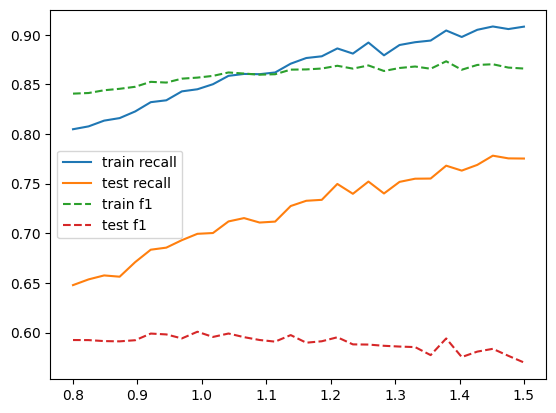

In [ ]:
# F1 Trade Off
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
import numpy as np


# Menginisialisasi model XGBoost dengan parameter default
param_values = [float(x) for x in np.linspace(0.8, 1.5, 30)]

train_scores_f1 = []
test_scores_f1 = []

train_scores_recall = []
test_scores_recall = []

for n in param_values:
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, scale_pos_weight=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()


Untuk scale_pos_weight gunakan default saja karena performa model aslinya cenderung lebih bagus

### n_estimators

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1; train recall: 0.05900297619047619; test recall: 0.05485367023828562; train f1: 0.10937051041870194; test f1: 0.09481686247408432


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 11; train recall: 0.42526041666666664; test recall: 0.3703822165360627; train f1: 0.5349421271019873; test f1: 0.34362017804154305


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 21; train recall: 0.5389136904761904; test recall: 0.43723012953782187; train f1: 0.6383466267130833; test f1: 0.4051270652737645


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 31; train recall: 0.6187251984126985; test recall: 0.4951223412761874; train f1: 0.7022773977423078; test f1: 0.45173998686802364


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 42; train recall: 0.6943824404761905; test recall: 0.5584519430673277; train f1: 0.7566636262288436; test f1: 0.49718801167509075


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 52; train recall: 0.7238095238095238; test recall: 0.5848392771469695; train f1: 0.780044502950158; test f1: 0.5251669419113951


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 62; train recall: 0.770734126984127; test recall: 0.6297777067007836; train f1: 0.809734743863672; test f1: 0.549079754601227


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 73; train recall: 0.7993551587301587; test recall: 0.6524868063329602; train f1: 0.8277686459831518; test f1: 0.5670998679546876


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 83; train recall: 0.822594246031746; test recall: 0.6739165200703662; train f1: 0.8431448563384578; test f1: 0.5833737108050114


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 93; train recall: 0.8446304563492063; test recall: 0.6943866943866944; train f1: 0.8552629100612149; test f1: 0.5929263962856752


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 104; train recall: 0.8548611111111111; test recall: 0.7038221653606269; train f1: 0.8616299925631042; test f1: 0.6005321689295218


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 114; train recall: 0.8673983134920635; test recall: 0.716616024308332; train f1: 0.868513034462635; test f1: 0.6078404774823657


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 124; train recall: 0.8751116071428572; test recall: 0.7246121861506477; train f1: 0.8727900116876611; test f1: 0.6127527216174183


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 135; train recall: 0.8876736111111111; test recall: 0.7370861986246602; train f1: 0.8791751361774514; test f1: 0.6168774677106338


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 145; train recall: 0.8925843253968254; test recall: 0.7439628978090517; train f1: 0.8822725461955689; test f1: 0.6218835639328922


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 155; train recall: 0.8976190476190476; test recall: 0.7495602110986727; train f1: 0.8845547530886828; test f1: 0.6231055570327041


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 165; train recall: 0.9009796626984127; test recall: 0.7506796737565968; train f1: 0.8863554571461685; test f1: 0.6238702817650186


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 176; train recall: 0.9061259920634921; test recall: 0.7572365264672957; train f1: 0.889124139105887; test f1: 0.6276927155829523


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 186; train recall: 0.9095114087301587; test recall: 0.7602750679673757; train f1: 0.8906740501909637; test f1: 0.6290856159851793


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 196; train recall: 0.9102306547619048; test recall: 0.7613945306252998; train f1: 0.8914704203456526; test f1: 0.6304707673972059


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 207; train recall: 0.9149925595238095; test recall: 0.7652326883096114; train f1: 0.8935404960279015; test f1: 0.6302687038988409


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 217; train recall: 0.9174107142857143; test recall: 0.7687509995202303; train f1: 0.8948995082770341; test f1: 0.6320010518012096


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 227; train recall: 0.9206969246031746; test recall: 0.7719494642571566; train f1: 0.896294463122695; test f1: 0.6325514349364435


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 238; train recall: 0.9212673611111111; test recall: 0.7713097713097713; train f1: 0.8967956494709713; test f1: 0.632815062651709


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 248; train recall: 0.9227306547619047; test recall: 0.7732288501519271; train f1: 0.8975753920386007; test f1: 0.6335997903289216


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 258; train recall: 0.9236979166666667; test recall: 0.7730689269150808; train f1: 0.8980288142745193; test f1: 0.6333857442348009


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 269; train recall: 0.9258556547619048; test recall: 0.7738685430993123; train f1: 0.8990210362806603; test f1: 0.6335013418864961


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 279; train recall: 0.9260540674603175; test recall: 0.7740284663361586; train f1: 0.8993815600103575; test f1: 0.6341719077568134


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 289; train recall: 0.9278149801587302; test recall: 0.7761074684151608; train f1: 0.9002027348144405; test f1: 0.6345864661654136


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 300; train recall: 0.9289806547619047; test recall: 0.7788261634415481; train f1: 0.9008893084559465; test f1: 0.6360608633187488


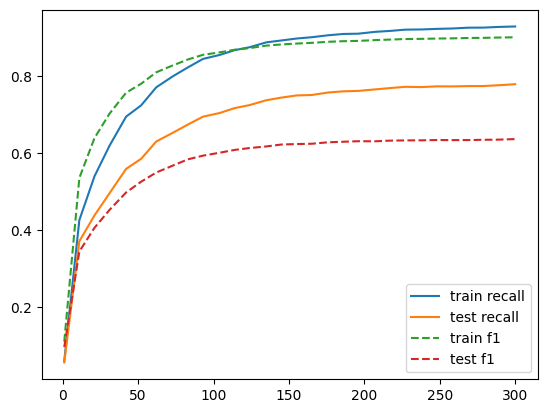

In [ ]:
# F1 Trade Off
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
import numpy as np


# Menginisialisasi model XGBoost dengan parameter default
param_values = [int(x) for x in np.linspace(1, 300, 30)]

train_scores_f1 = []
test_scores_f1 = []

train_scores_recall = []
test_scores_recall = []

for n in param_values:
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, n_estimators=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()


### max_depth

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:55:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1; train recall: 0.2918030753968254; test recall: 0.28786182632336477; train f1: 0.39113704174666103; test f1: 0.25808301670370637


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:55:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 2; train recall: 0.38090277777777776; test recall: 0.2988965296657604; train f1: 0.4892446143431689; test f1: 0.28


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:55:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 3; train recall: 0.4635416666666667; test recall: 0.34655365424596196; train f1: 0.5729350275125301; test f1: 0.3318529862174579


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:55:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 4; train recall: 0.5837549603174603; test recall: 0.44410682872221335; train f1: 0.6772019420967452; test f1: 0.4171548745681238


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 5; train recall: 0.7186135912698413; test recall: 0.5763633455941148; train f1: 0.7768014530928491; test f1: 0.5185984603208864


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 6; train recall: 0.8519097222222223; test recall: 0.6998240844394691; train f1: 0.8598105107698469; test f1: 0.5980184489238127


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 8; train recall: 0.9299107142857143; test recall: 0.7745082360466976; train f1: 0.9017641329052275; test f1: 0.6340250049093409


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 9; train recall: 0.9470982142857143; test recall: 0.7791460099152406; train f1: 0.9119555807636048; test f1: 0.6357408494813075


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 10; train recall: 0.964124503968254; test recall: 0.7804253958100112; train f1: 0.9216097676623992; test f1: 0.6336016619059984


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 11; train recall: 0.9782614087301588; test recall: 0.7799456260994723; train f1: 0.9292904305008275; test f1: 0.6346541739865964


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 12; train recall: 0.990922619047619; test recall: 0.781864704941628; train f1: 0.9359374542473134; test f1: 0.633495302883058


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 13; train recall: 0.996155753968254; test recall: 0.7804253958100112; train f1: 0.9386209878130003; test f1: 0.633930891140556


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 15; train recall: 0.9989583333333333; test recall: 0.7802654725731649; train f1: 0.9400205377147125; test f1: 0.6329787234042553


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 16; train recall: 0.9991319444444444; test recall: 0.7804253958100112; train f1: 0.9401125988156704; test f1: 0.633930891140556


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 17; train recall: 0.9991443452380953; test recall: 0.7801055493363186; train f1: 0.940118782306337; test f1: 0.6336710833982853


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 18; train recall: 0.9991443452380953; test recall: 0.7789860866783944; train f1: 0.940118782306337; test f1: 0.6326384830183778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 19; train recall: 0.9991443452380953; test recall: 0.7799456260994723; train f1: 0.9401132975899468; test f1: 0.6344890392246146


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 20; train recall: 0.9991443452380953; test recall: 0.7780265472573165; train f1: 0.940118782306337; test f1: 0.6313262392940566


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 22; train recall: 0.9991443452380953; test recall: 0.7788261634415481; train f1: 0.940118782306337; test f1: 0.632755148444098


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 23; train recall: 0.9991443452380953; test recall: 0.7802654725731649; train f1: 0.940118782306337; test f1: 0.6332662729573626


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 24; train recall: 0.9991443452380953; test recall: 0.7801055493363186; train f1: 0.940118782306337; test f1: 0.6333419890937418


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 25; train recall: 0.9991443452380953; test recall: 0.7805853190468575; train f1: 0.940118782306337; test f1: 0.6321719984457972


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:58:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 26; train recall: 0.9991443452380953; test recall: 0.7781864704941628; train f1: 0.940118782306337; test f1: 0.6302292449164616


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:58:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 27; train recall: 0.9989459325396826; test recall: 0.7817047817047817; train f1: 0.9401076009196261; test f1: 0.6345579644294431


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:58:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 29; train recall: 0.9991443452380953; test recall: 0.779305933152087; train f1: 0.940118782306337; test f1: 0.6331038066779264


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:58:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 30; train recall: 0.9991443452380953; test recall: 0.7797857028626259; train f1: 0.940118782306337; test f1: 0.6334524196167587


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 31; train recall: 0.9991443452380953; test recall: 0.7820246281784743; train f1: 0.940118782306337; test f1: 0.6337069915116957


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:59:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 32; train recall: 0.9991443452380953; test recall: 0.7802654725731649; train f1: 0.940118782306337; test f1: 0.6338833311679876


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:59:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 33; train recall: 0.9989459325396826; test recall: 0.7805853190468575; train f1: 0.9401076009196261; test f1: 0.6341843695186123


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:59:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 35; train recall: 0.9989459325396826; test recall: 0.7799456260994723; train f1: 0.9401076009196261; test f1: 0.6331299493703751


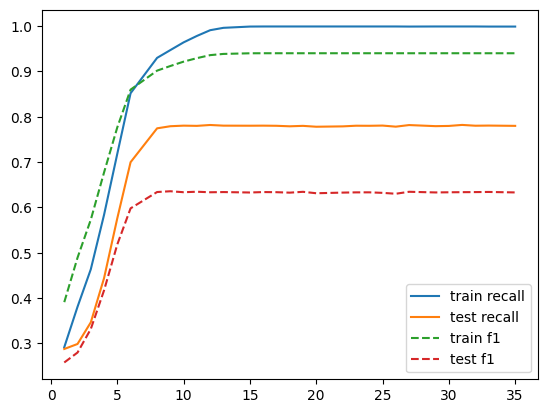

In [ ]:
# F1 Trade Off
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
import numpy as np

#scale_pos_weight_value = sum(y_train == 0) / sum(y_train == 1)

# Menginisialisasi model XGBoost dengan parameter default
param_values = [int(x) for x in np.linspace(1, 35, 30)]

train_scores_f1 = []
test_scores_f1 = []

train_scores_recall = []
test_scores_recall = []

for n in param_values:
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, max_depth=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()


Dari Learning Curve max_depth yang paling optimal range 6 - 12

### learning_rate

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.4; train recall: 0.8844246031746031; test recall: 0.7353270430193507; train f1: 0.8770937353961188; test f1: 0.6142542248346804


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.4206896551724138; train recall: 0.8909598214285714; test recall: 0.7458819766512074; train f1: 0.8795617310399706; test f1: 0.6163197885695408


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.4413793103448276; train recall: 0.8933531746031746; test recall: 0.7505197505197505; train f1: 0.8804209008304359; test f1: 0.6198652753929468


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.4620689655172414; train recall: 0.9025917658730159; test recall: 0.7597952982568367; train f1: 0.8847949235369915; test f1: 0.6211675491926522


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.4827586206896552; train recall: 0.9029885912698413; test recall: 0.7586758355989125; train f1: 0.8847160882322567; test f1: 0.6202117923911622


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.503448275862069; train recall: 0.8990451388888889; test recall: 0.7567567567567568; train f1: 0.8832347548532896; test f1: 0.6215683698936031


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5241379310344828; train recall: 0.9035714285714286; test recall: 0.7581960658883736; train f1: 0.8850720615119252; test f1: 0.61921243387971


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5448275862068965; train recall: 0.9109747023809524; test recall: 0.7687509995202303; train f1: 0.8895791328356312; test f1: 0.6234760051880675


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5655172413793104; train recall: 0.913702876984127; test recall: 0.7695506157044618; train f1: 0.8905070672766058; test f1: 0.6246916785667922


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5862068965517242; train recall: 0.9139260912698413; test recall: 0.7700303854150008; train f1: 0.8902404406568784; test f1: 0.6254058968697234


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6068965517241379; train recall: 0.9161458333333333; test recall: 0.7722693107308491; train f1: 0.8908906736126185; test f1: 0.6248706004140787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6275862068965518; train recall: 0.913516865079365; test recall: 0.7706700783623861; train f1: 0.8901428873515995; test f1: 0.6251540507232276


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6482758620689655; train recall: 0.9193328373015873; test recall: 0.7748280825203903; train f1: 0.8929130633777371; test f1: 0.6231511254019293


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6689655172413793; train recall: 0.9219246031746032; test recall: 0.7799456260994723; train f1: 0.8934395692877144; test f1: 0.6251361917579953


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6896551724137931; train recall: 0.9187996031746032; test recall: 0.7796257796257796; train f1: 0.8924972746381743; test f1: 0.6270499710592321


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.710344827586207; train recall: 0.9213045634920635; test recall: 0.7807452422837038; train f1: 0.8935366704351382; test f1: 0.6288805874017777


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7310344827586207; train recall: 0.9231646825396825; test recall: 0.7807452422837038; train f1: 0.8949855131703915; test f1: 0.627264550944366


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7517241379310344; train recall: 0.9248139880952381; test recall: 0.7858627858627859; train f1: 0.895319731321244; test f1: 0.6291127896556139


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7724137931034483; train recall: 0.9249131944444444; test recall: 0.7858627858627859; train f1: 0.8954856525393204; test f1: 0.628911499328086


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7931034482758621; train recall: 0.9274677579365079; test recall: 0.7815448584679354; train f1: 0.8968175931699363; test f1: 0.6260568793235972


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8137931034482759; train recall: 0.9281870039682539; test recall: 0.7911402526787142; train f1: 0.8966583009385988; test f1: 0.6276325805633088


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8344827586206897; train recall: 0.9294022817460318; test recall: 0.7882616344154806; train f1: 0.8969673033654076; test f1: 0.6282982791586998


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8551724137931035; train recall: 0.9304811507936508; test recall: 0.7919398688629458; train f1: 0.8972782933129245; test f1: 0.62970498474059


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8758620689655172; train recall: 0.9295014880952381; test recall: 0.7882616344154806; train f1: 0.8969664333153833; test f1: 0.6284184356473513


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.896551724137931; train recall: 0.9303819444444444; test recall: 0.7892211738365584; train f1: 0.8982836754608094; test f1: 0.6266666666666667


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9172413793103449; train recall: 0.9325644841269841; test recall: 0.7949784103630257; train f1: 0.8988734498730017; test f1: 0.6273742664226668


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9379310344827586; train recall: 0.9327008928571429; test recall: 0.7932192547577163; train f1: 0.8985377392301627; test f1: 0.6260650047333544


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9586206896551724; train recall: 0.9332465277777777; test recall: 0.7927394850471774; train f1: 0.8985374007521939; test f1: 0.6273095418881296


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9793103448275863; train recall: 0.9322792658730159; test recall: 0.7936990244682552; train f1: 0.8982925284678162; test f1: 0.6279893711248893


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:00:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.0; train recall: 0.9350322420634921; test recall: 0.7967375659683352; train f1: 0.8988776100186568; test f1: 0.6270215845447108


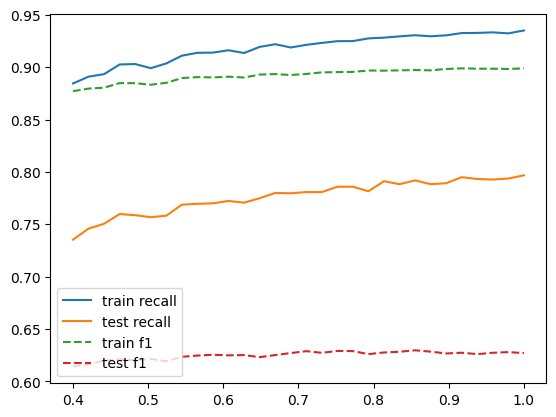

In [ ]:
# F1 Trade Off
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
import numpy as np



# Menginisialisasi model XGBoost dengan parameter default
param_values = [float(x) for x in np.linspace(0.4, 1, 30)]

train_scores_f1 = []
test_scores_f1 = []

train_scores_recall = []
test_scores_recall = []

for n in param_values:
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, learning_rate=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()


Dari Learning Curve learning rate range terbaik adalah 0.4 - 0.82

### subsample

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.01; train recall: 0.6854538690476191; test recall: 0.6085079162002239; train f1: 0.6975423541660094; test f1: 0.4096463368681703


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.04413793103448276; train recall: 0.798251488095238; test recall: 0.6652806652806653; train f1: 0.8148279419489997; test f1: 0.5399792315680166


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.07827586206896552; train recall: 0.8123263888888889; test recall: 0.6735966735966736; train f1: 0.8313207906342206; test f1: 0.5671581498687134


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.11241379310344828; train recall: 0.828782242063492; test recall: 0.692147769070846; train f1: 0.8402386205769388; test f1: 0.5750730799893702


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.14655172413793105; train recall: 0.8352430555555556; test recall: 0.6875099952023029; train f1: 0.8456192993138775; test f1: 0.5784056508577194


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.1806896551724138; train recall: 0.8305183531746032; test recall: 0.6899088437549976; train f1: 0.8456347026774497; test f1: 0.5866195267881426


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.21482758620689657; train recall: 0.8356150793650794; test recall: 0.6927874620182313; train f1: 0.8486756760160707; test f1: 0.5870714188914488


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.24896551724137933; train recall: 0.8425843253968254; test recall: 0.6980649288341596; train f1: 0.8533999849280314; test f1: 0.5926680244399185


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.2831034482758621; train recall: 0.847110615079365; test recall: 0.700303854150008; train f1: 0.8552130802744253; test f1: 0.5931594988147646


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.31724137931034485; train recall: 0.8365823412698413; test recall: 0.689588997281305; train f1: 0.8495243132291922; test f1: 0.5865469632047882


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.3513793103448276; train recall: 0.8411334325396825; test recall: 0.694706540860387; train f1: 0.8518662714759369; test f1: 0.5901372096182584


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.38551724137931037; train recall: 0.8372767857142858; test recall: 0.6851111466496081; train f1: 0.8514840247432042; test f1: 0.5885828123926633


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.41965517241379313; train recall: 0.8485119047619047; test recall: 0.7043019350711658; train f1: 0.8580780276144017; test f1: 0.6019682886823401


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.4537931034482759; train recall: 0.8495039682539682; test recall: 0.7033423956500879; train f1: 0.8558881038500222; test f1: 0.5926824337982616


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.48793103448275865; train recall: 0.8433655753968254; test recall: 0.6971053894130818; train f1: 0.8546259935283215; test f1: 0.5958988380041012


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5220689655172415; train recall: 0.8409722222222222; test recall: 0.6918279225971534; train f1: 0.8546493676708737; test f1: 0.5951300041271151


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5562068965517242; train recall: 0.8453125; test recall: 0.6929473852550776; train f1: 0.8549015181443648; test f1: 0.5883630932174622


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5903448275862069; train recall: 0.8516369047619048; test recall: 0.700303854150008; train f1: 0.8587237181851716; test f1: 0.5945689069925323


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6244827586206897; train recall: 0.8468501984126984; test recall: 0.6987046217815449; train f1: 0.8561399109885288; test f1: 0.5954749897778383


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6586206896551725; train recall: 0.8532490079365079; test recall: 0.7070206300975532; train f1: 0.8603169641461661; test f1: 0.601128560745122


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6927586206896552; train recall: 0.8455357142857143; test recall: 0.6963057732288501; train f1: 0.8557014131171407; test f1: 0.5928245625978623


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7268965517241379; train recall: 0.8422867063492063; test recall: 0.7004637773868543; train f1: 0.8525952425782967; test f1: 0.5938177874186551


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7610344827586207; train recall: 0.8526289682539683; test recall: 0.7035023188869343; train f1: 0.8588756269244943; test f1: 0.5958282540972505


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7951724137931035; train recall: 0.8431671626984127; test recall: 0.6916679993603071; train f1: 0.8548814987112592; test f1: 0.5948696788391444


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8293103448275863; train recall: 0.8565352182539683; test recall: 0.7113385574924036; train f1: 0.8615137076857834; test f1: 0.6020166474927252


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.863448275862069; train recall: 0.8440228174603175; test recall: 0.6907084599392291; train f1: 0.8551684277978112; test f1: 0.592089930769758


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8975862068965518; train recall: 0.8519965277777778; test recall: 0.7031824724132416; train f1: 0.8589842968593718; test f1: 0.5970939706681152


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9317241379310346; train recall: 0.8502604166666666; test recall: 0.7017431632816248; train f1: 0.8577433337711808; test f1: 0.5959527366562543


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9658620689655173; train recall: 0.8503348214285714; test recall: 0.7063809371501679; train f1: 0.8578505883015256; test f1: 0.5974166497599243


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.0; train recall: 0.8519097222222223; test recall: 0.6998240844394691; train f1: 0.8598105107698469; test f1: 0.5980184489238127


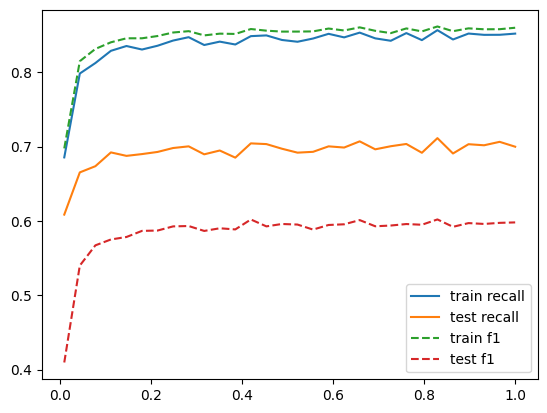

In [ ]:
# F1 Trade Off
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
import numpy as np



# Menginisialisasi model XGBoost dengan parameter default
param_values = [float(x) for x in np.linspace(0.01, 1, 30)]

train_scores_f1 = []
test_scores_f1 = []

train_scores_recall = []
test_scores_recall = []

for n in param_values:
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, subsample=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()


subsample : 0.28 - 0.95

### colsample_bytree


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.01; train recall: 0.3957217261904762; test recall: 0.2641931872701104; train f1: 0.5065559718077338; test f1: 0.2564221963523477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.04413793103448276; train recall: 0.3957217261904762; test recall: 0.2641931872701104; train f1: 0.5065559718077338; test f1: 0.2564221963523477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.07827586206896552; train recall: 0.3957217261904762; test recall: 0.2641931872701104; train f1: 0.5065559718077338; test f1: 0.2564221963523477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.11241379310344828; train recall: 0.3957217261904762; test recall: 0.2641931872701104; train f1: 0.5065559718077338; test f1: 0.2564221963523477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.14655172413793105; train recall: 0.3957217261904762; test recall: 0.2641931872701104; train f1: 0.5065559718077338; test f1: 0.2564221963523477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.1806896551724138; train recall: 0.3957217261904762; test recall: 0.2641931872701104; train f1: 0.5065559718077338; test f1: 0.2564221963523477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.21482758620689657; train recall: 0.5926835317460317; test recall: 0.43531105069566606; train f1: 0.6842964320485654; test f1: 0.41114719432067065


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.24896551724137933; train recall: 0.5926835317460317; test recall: 0.43531105069566606; train f1: 0.6842964320485654; test f1: 0.41114719432067065


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.2831034482758621; train recall: 0.5926835317460317; test recall: 0.43531105069566606; train f1: 0.6842964320485654; test f1: 0.41114719432067065


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.31724137931034485; train recall: 0.730171130952381; test recall: 0.572365264672957; train f1: 0.7839928632296549; test f1: 0.5124203593671701


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.3513793103448276; train recall: 0.730171130952381; test recall: 0.572365264672957; train f1: 0.7839928632296549; test f1: 0.5124203593671701


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.38551724137931037; train recall: 0.730171130952381; test recall: 0.572365264672957; train f1: 0.7839928632296549; test f1: 0.5124203593671701


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.41965517241379313; train recall: 0.782452876984127; test recall: 0.6296177834639373; train f1: 0.8173821799621732; test f1: 0.5543899176230374


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.4537931034482759; train recall: 0.782452876984127; test recall: 0.6296177834639373; train f1: 0.8173821799621732; test f1: 0.5543899176230374


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.48793103448275865; train recall: 0.782452876984127; test recall: 0.6296177834639373; train f1: 0.8173821799621732; test f1: 0.5543899176230374


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5220689655172415; train recall: 0.8198288690476191; test recall: 0.6665600511754358; train f1: 0.8413423604571254; test f1: 0.5809059233449477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5562068965517242; train recall: 0.8198288690476191; test recall: 0.6665600511754358; train f1: 0.8413423604571254; test f1: 0.5809059233449477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5903448275862069; train recall: 0.8198288690476191; test recall: 0.6665600511754358; train f1: 0.8413423604571254; test f1: 0.5809059233449477


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6244827586206897; train recall: 0.8242435515873016; test recall: 0.6719974412282105; train f1: 0.843671858141985; test f1: 0.5795062749965522


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6586206896551725; train recall: 0.8242435515873016; test recall: 0.6719974412282105; train f1: 0.843671858141985; test f1: 0.5795062749965522


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6927586206896552; train recall: 0.8242435515873016; test recall: 0.6719974412282105; train f1: 0.843671858141985; test f1: 0.5795062749965522


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7268965517241379; train recall: 0.8449156746031746; test recall: 0.6926275387813849; train f1: 0.8555033776148263; test f1: 0.5925571213572308


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7610344827586207; train recall: 0.8449156746031746; test recall: 0.6926275387813849; train f1: 0.8555033776148263; test f1: 0.5925571213572308


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7951724137931035; train recall: 0.8449156746031746; test recall: 0.6926275387813849; train f1: 0.8555033776148263; test f1: 0.5925571213572308


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8293103448275863; train recall: 0.8440228174603175; test recall: 0.7006237006237006; train f1: 0.8552329014990638; test f1: 0.5970698466780239


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.863448275862069; train recall: 0.8440228174603175; test recall: 0.7006237006237006; train f1: 0.8552329014990638; test f1: 0.5970698466780239


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8975862068965518; train recall: 0.8440228174603175; test recall: 0.7006237006237006; train f1: 0.8552329014990638; test f1: 0.5970698466780239


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9317241379310346; train recall: 0.8519345238095238; test recall: 0.7030225491763953; train f1: 0.8586855985801065; test f1: 0.5955025738282308


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9658620689655173; train recall: 0.8519345238095238; test recall: 0.7030225491763953; train f1: 0.8586855985801065; test f1: 0.5955025738282308


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.0; train recall: 0.8519097222222223; test recall: 0.6998240844394691; train f1: 0.8598105107698469; test f1: 0.5980184489238127


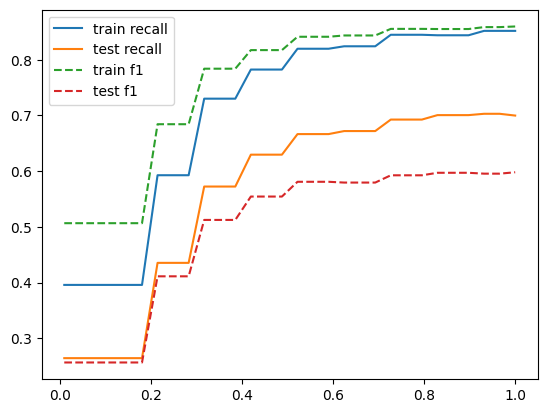

In [ ]:
# F1 Trade Off
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
import numpy as np



# Menginisialisasi model XGBoost dengan parameter default
param_values = [float(x) for x in np.linspace(0.01, 1, 30)]

train_scores_f1 = []
test_scores_f1 = []

train_scores_recall = []
test_scores_recall = []

for n in param_values:
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, colsample_bytree=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()


colsample_bytree : 0.75 - 1

### gamma

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.0; train recall: 0.8519097222222223; test recall: 0.6998240844394691; train f1: 0.8598105107698469; test f1: 0.5980184489238127


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.034482758620689655; train recall: 0.8510416666666667; test recall: 0.7052614744922437; train f1: 0.8587463164678133; test f1: 0.5999591864499013


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.06896551724137931; train recall: 0.8534350198412698; test recall: 0.7081400927554774; train f1: 0.8606551739231024; test f1: 0.6023260559069578


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.10344827586206896; train recall: 0.8451016865079365; test recall: 0.7051015512553974; train f1: 0.8558797857443374; test f1: 0.6027753093171099


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.13793103448275862; train recall: 0.8508184523809523; test recall: 0.6991843914920838; train f1: 0.8595482391851769; test f1: 0.5983713132142613


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.1724137931034483; train recall: 0.8515252976190476; test recall: 0.7083000159923237; train f1: 0.857710299343605; test f1: 0.5975848343790056


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.20689655172413793; train recall: 0.8497147817460318; test recall: 0.7041420118343196; train f1: 0.8574932579137389; test f1: 0.5976652640152029


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.24137931034482757; train recall: 0.8526537698412698; test recall: 0.7039820885974732; train f1: 0.858069910521521; test f1: 0.5965982245713899


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.27586206896551724; train recall: 0.8637152777777778; test recall: 0.7183751799136414; train f1: 0.8652926341420993; test f1: 0.6059624983137731


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.3103448275862069; train recall: 0.8501240079365079; test recall: 0.7095794018870942; train f1: 0.8583251428893383; test f1: 0.6010159160176092


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.3448275862068966; train recall: 0.8599826388888889; test recall: 0.7194946425715657; train f1: 0.8627321697373823; test f1: 0.6047449425364608


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.3793103448275862; train recall: 0.8541790674603175; test recall: 0.7028626259395491; train f1: 0.8597497425656068; test f1: 0.5956898888587693


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.41379310344827586; train recall: 0.8456349206349206; test recall: 0.7012633935710859; train f1: 0.855619267493946; test f1: 0.5983897379912664


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.4482758620689655; train recall: 0.8456101190476191; test recall: 0.7012633935710859; train f1: 0.8556049085296996; test f1: 0.5983897379912664


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.48275862068965514; train recall: 0.8546750992063492; test recall: 0.7103790180713258; train f1: 0.8607647106576162; test f1: 0.6035736123377947


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5172413793103449; train recall: 0.8524553571428571; test recall: 0.7132576363345594; train f1: 0.8584326629494808; test f1: 0.6020518358531317


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5517241379310345; train recall: 0.8407614087301587; test recall: 0.6910283064129218; train f1: 0.8532469166876416; test f1: 0.5933809393023894


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.5862068965517241; train recall: 0.8498139880952381; test recall: 0.7038221653606269; train f1: 0.8590823617901466; test f1: 0.6014760147601476


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6206896551724138; train recall: 0.8583333333333333; test recall: 0.7122980969134816; train f1: 0.8627250574913218; test f1: 0.6034003928740771


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6551724137931034; train recall: 0.8595362103174603; test recall: 0.7095794018870942; train f1: 0.8632347171973174; test f1: 0.6004059539918809


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.6896551724137931; train recall: 0.8522321428571429; test recall: 0.7030225491763953; train f1: 0.8592057310387508; test f1: 0.6000955566172957


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7241379310344828; train recall: 0.8430183531746032; test recall: 0.6950263873340796; train f1: 0.8543653935577926; test f1: 0.594853545031481


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7586206896551724; train recall: 0.8430183531746032; test recall: 0.6950263873340796; train f1: 0.8543653935577926; test f1: 0.594853545031481


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.7931034482758621; train recall: 0.8430183531746032; test recall: 0.6948664640972333; train f1: 0.8543653935577926; test f1: 0.5947573745807953


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8275862068965517; train recall: 0.8525173611111111; test recall: 0.7068607068607069; train f1: 0.8602676644121456; test f1: 0.6016470428095011


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.8620689655172413; train recall: 0.8612351190476191; test recall: 0.7150167919398689; train f1: 0.863854320204489; test f1: 0.602641865480523


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.896551724137931; train recall: 0.8574156746031746; test recall: 0.7098992483607868; train f1: 0.8628297601517458; test f1: 0.605345697531706


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9310344827586207; train recall: 0.8555431547619048; test recall: 0.7089397089397089; train f1: 0.8616012888239482; test f1: 0.6045687009887487


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 0.9655172413793103; train recall: 0.8489459325396825; test recall: 0.6964656964656964; train f1: 0.8581510498276402; test f1: 0.5979678703830839


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1.0; train recall: 0.8536582341269842; test recall: 0.7073404765712458; train f1: 0.8601703121973772; test f1: 0.600706233872063


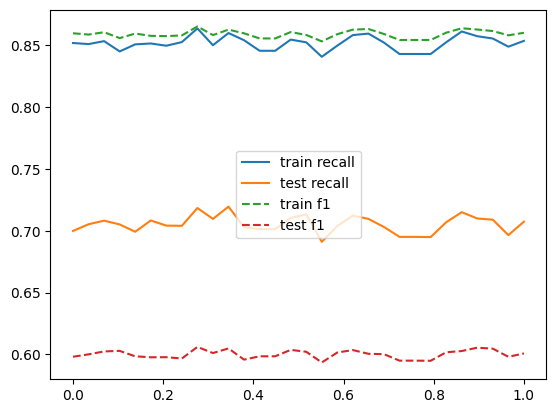

In [ ]:
# F1 Trade Off
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
import numpy as np



# Menginisialisasi model XGBoost dengan parameter default
param_values = [float(x) for x in np.linspace(0, 1, 30)]

train_scores_f1 = []
test_scores_f1 = []

train_scores_recall = []
test_scores_recall = []

for n in param_values:
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, gamma=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()


gamma : 0.27 - 1

### min_child_weight

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 1; train recall: 0.8519097222222223; test recall: 0.6998240844394691; train f1: 0.8598105107698469; test f1: 0.5980184489238127


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 2; train recall: 0.845672123015873; test recall: 0.6971053894130818; train f1: 0.8562101760883895; test f1: 0.5955324817268939


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 3; train recall: 0.8382068452380952; test recall: 0.6887893810970734; train f1: 0.8516029053249592; test f1: 0.5916208791208791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 4; train recall: 0.8441592261904762; test recall: 0.6972653126499281; train f1: 0.8554732417199193; test f1: 0.5970558028072578


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 5; train recall: 0.8479290674603175; test recall: 0.6974252358867743; train f1: 0.8565219025190716; test f1: 0.5960500239185403


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 6; train recall: 0.8425843253968254; test recall: 0.6942267711498481; train f1: 0.8546935438221328; test f1: 0.5957592808618678


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 7; train recall: 0.8520089285714286; test recall: 0.7105389413081721; train f1: 0.8591794115072467; test f1: 0.5986257073565077


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 8; train recall: 0.8532862103174603; test recall: 0.7036622421237806; train f1: 0.8602684236517869; test f1: 0.5992917461182239


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 9; train recall: 0.8564732142857143; test recall: 0.7110187110187111; train f1: 0.8610808081437753; test f1: 0.602031144211239


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 10; train recall: 0.8292782738095238; test recall: 0.675835598912522; train f1: 0.8472765973621195; test f1: 0.5851564663528108


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 11; train recall: 0.8490823412698413; test recall: 0.7054213977290901; train f1: 0.8569783596380339; test f1: 0.5981422469319954


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 12; train recall: 0.8440600198412699; test recall: 0.6961458499920038; train f1: 0.8559643353433478; test f1: 0.5962196959320641


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 13; train recall: 0.8538566468253969; test recall: 0.7092595554134016; train f1: 0.8609134897910702; test f1: 0.602499660372232


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 14; train recall: 0.8417410714285715; test recall: 0.6955061570446186; train f1: 0.8527922608204033; test f1: 0.591861731083288


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 15; train recall: 0.8630208333333333; test recall: 0.7169358707820246; train f1: 0.8643606781345091; test f1: 0.6032429522976519


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 16; train recall: 0.8423115079365079; test recall: 0.6943866943866944; train f1: 0.8552397980383022; test f1: 0.5948760104123852


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 17; train recall: 0.8531374007936507; test recall: 0.7063809371501679; train f1: 0.8596723605783049; test f1: 0.598225773684567


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 18; train recall: 0.8322048611111111; test recall: 0.6828722213337598; train f1: 0.8480747115542582; test f1: 0.5872644753128868


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 19; train recall: 0.8415922619047619; test recall: 0.6971053894130818; train f1: 0.8535959550222625; test f1: 0.5955324817268939


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 20; train recall: 0.8449900793650794; test recall: 0.7038221653606269; train f1: 0.8537135411446326; test f1: 0.5940072884329869


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 21; train recall: 0.8426463293650793; test recall: 0.6974252358867743; train f1: 0.8546220601182242; test f1: 0.5969883641341547


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 22; train recall: 0.844295634920635; test recall: 0.6948664640972333; train f1: 0.8542373731987478; test f1: 0.5909554573274396


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 23; train recall: 0.8375124007936507; test recall: 0.6918279225971534; train f1: 0.8510903740855791; test f1: 0.5937414219050233


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 24; train recall: 0.8470982142857143; test recall: 0.7049416280185511; train f1: 0.8547243823549653; test f1: 0.5964413774440159


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 25; train recall: 0.837202380952381; test recall: 0.6916679993603071; train f1: 0.8509469040491571; test f1: 0.5910892442257756


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 26; train recall: 0.8358134920634921; test recall: 0.687030225491764; train f1: 0.8498940784828004; test f1: 0.5884125462265443


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 27; train recall: 0.8319196428571428; test recall: 0.6859107628338398; train f1: 0.8473717782731987; test f1: 0.5878563596491229


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 28; train recall: 0.8397445436507937; test recall: 0.6908683831760755; train f1: 0.8530630755470453; test f1: 0.5952052907136952


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 29; train recall: 0.8410342261904762; test recall: 0.6948664640972333; train f1: 0.8520921934580085; test f1: 0.5907947515126794


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


param value: 31; train recall: 0.8437127976190476; test recall: 0.6923076923076923; train f1: 0.8532836691310646; test f1: 0.591595490263068


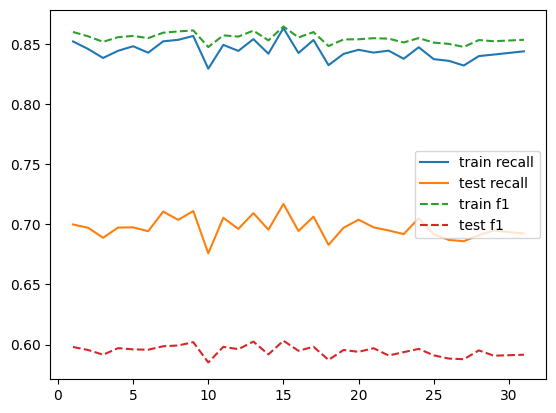

In [ ]:
# F1 Trade Off
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
import numpy as np



# Menginisialisasi model XGBoost dengan parameter default
param_values = [int(x) for x in np.linspace(1, 31, 30)]

train_scores_f1 = []
test_scores_f1 = []

train_scores_recall = []
test_scores_recall = []

for n in param_values:
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, min_child_weight=n)
    model.fit(X_train_selected, y_train_resampled)

    # Evaluasi on train (recall)
    y_pred_train = model.predict(X_train_selected)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_scores_recall.append(train_recall)

    # Evaluasi on test (recall)
    y_pred = model.predict(X_test_selected)
    test_recall = recall_score(y_test, y_pred)
    test_scores_recall.append(test_recall)

    # Evaluasi on train (F1)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_scores_f1.append(train_f1)

    # Evaluasi on test (F1)
    test_f1 = f1_score(y_test, y_pred)
    test_scores_f1.append(test_f1)

    print(f'param value: {n}; train recall: {train_recall}; test recall: {test_recall}; train f1: {train_f1}; test f1: {test_f1}')

# Plot Recall
plt.plot(param_values, train_scores_recall, label='train recall')
plt.plot(param_values, test_scores_recall, label='test recall')

# Plot F1
plt.plot(param_values, train_scores_f1, label='train f1', linestyle='--')
plt.plot(param_values, test_scores_f1, label='test f1', linestyle='--')

plt.legend()
plt.show()


## Random Search Tuning Xgb

### Scoring by recall

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np



param_grid = {
    'n_estimators': [int(x) for x in np.linspace(6, 15, 8)],
    'max_depth': [int(x) for x in np.linspace(6, 12, 5)],
    'learning_rate': [float(x) for x in np.linspace(0.4, 0.82, 30)],
    'subsample': [float(x) for x in np.linspace(0.28, 0.95, 30)],
    'colsample_bytree': [float(x) for x in np.linspace(0.75, 1, 30)],
    'gamma': [float(x) for x in np.linspace(0.27, 1, 30)],
    'min_child_weight': [int(x) for x in np.linspace(7, 17, 9)]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=60,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1
)

random_search_xgb.fit(X_train_selected, y_train_resampled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:09:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                                      0.5572413793103448,
                                                      0.5803448275862069,
                                                      0.603448275862069,
                                                      0.626551724137931,
                                                      0.6496551724137931,
                                                      0.6727586206896552,
                                                      0.6958620689655173,
                                                      0.7189655172413794,
                                                      0.7420689655172414,
                                                      0.7651724137931035,
                                                      0.7882758620689655,
                                                      0.8113793103448276,
                                                      0.8344827586206897,
                                                      0.8575862068965517,
                                                      0.8806896551724138,
                                                      0.9037931034482759,
                                                      0.9268965517241379,
                                                      0.95]},
                   scoring='recall', verbose=2)

In [ ]:
xgb_best_recall_model = random_search_xgb.best_estimator_
eval_classification(xgb_best_recall_model)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.91
Precision (Test Set): 0.52
Precision (Train Set): 0.87
Recall (Test Set): 0.79
Recall (Train Set): 0.93
F1-Score (Test Set): 0.63
F1-Score (Train Set): 0.90
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.96


### Scoring by recall and F1

In [ ]:
from sklearn.metrics import make_scorer, recall_score, f1_score

def custom_recall_f1_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    # Berikan bobot lebih tinggi pada recall (misalnya 70% recall, 30% F1)
    return 0.7 * recall + 0.3 * f1

# Buat scorer untuk digunakan di RandomizedSearchCV
custom_scorer = make_scorer(custom_recall_f1_score)

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(6, 15, 8)],
    'max_depth': [int(x) for x in np.linspace(6, 12, 5)],
    'learning_rate': [float(x) for x in np.linspace(0.4, 0.82, 30)],
    'subsample': [float(x) for x in np.linspace(0.28, 0.95, 30)],
    'colsample_bytree': [float(x) for x in np.linspace(0.75, 1, 30)],
    'gamma': [float(x) for x in np.linspace(0.27, 1, 30)],
    'min_child_weight': [int(x) for x in np.linspace(7, 17, 9)]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')

random_search_xgb_custom = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=60,
    scoring=custom_scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

random_search_xgb_custom.fit(X_train_selected, y_train_resampled)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:19:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                                      0.626551724137931,
                                                      0.6496551724137931,
                                                      0.6727586206896552,
                                                      0.6958620689655173,
                                                      0.7189655172413794,
                                                      0.7420689655172414,
                                                      0.7651724137931035,
                                                      0.7882758620689655,
                                                      0.8113793103448276,
                                                      0.8344827586206897,
                                                      0.8575862068965517,
                                                      0.8806896551724138,
                                                      0.9037931034482759,
                                                      0.9268965517241379,
                                                      0.95]},
                   scoring=make_scorer(custom_recall_f1_score, response_method='predict'),
                   verbose=2)

In [ ]:
xgb_custom_model = random_search_xgb_custom.best_estimator_
eval_classification(xgb_custom_model)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.91
Precision (Test Set): 0.52
Precision (Train Set): 0.87
Recall (Test Set): 0.79
Recall (Train Set): 0.93
F1-Score (Test Set): 0.63
F1-Score (Train Set): 0.89
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.96


# **Evaluasi Default Rate**

## Model Decision Tree


True Positive (TP): 5019
False Positive (FP): 6467
True Negative (TN): 37680
False Negative (FN): 1234


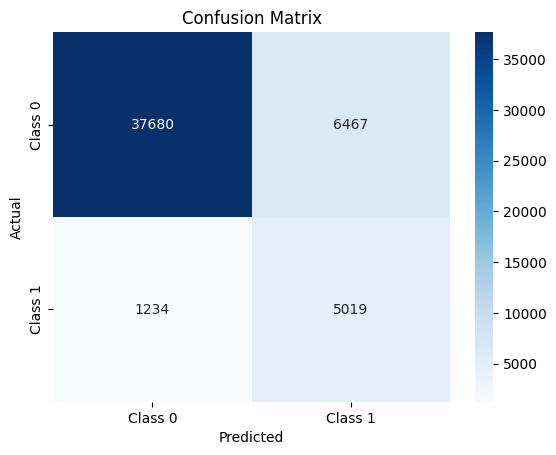

In [ ]:
from sklearn.metrics import confusion_matrix

# Prediksi pada data test
y_pred = random_search_dt.predict(X_test_scaled)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ambil nilai True Positives, False Positives, True Negatives, dan False Negatives
TP = cm[1, 1]  # True Positive: Prediksi benar kelas positif
FP = cm[0, 1]  # False Positive: Prediksi kelas positif, padahal sebenarnya kelas negatif
TN = cm[0, 0]  # True Negative: Prediksi benar kelas negatif
FN = cm[1, 0]  # False Negative: Prediksi kelas negatif, padahal sebenarnya kelas positif

# Menampilkan hasil
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

# Visualisasi confusion matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Default Rate

In [ ]:
default_rate = FN / (FN + TN)
default_rate

0.03171095235647839

### Potentially Loss

In [ ]:
loss = FP / (TN + FP)
loss

0.14648787007044647

# Membuat Pipeline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv('Training Data.csv')
df.columns = df.columns.str.lower()
df.head()

,id,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['risk_flag','id'])
y = df['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Banyak data latih', X_train.shape[0])
print(f'Banyak data test', X_test.shape[0])

Banyak data latih 201600
Banyak data test 50400


In [ ]:
X_train_selection = X_train.drop(columns = ['state' ])
X_test_selection = X_test.drop(columns=['state'])

print(f'Fitur yang dipilih : {X_train_selection.columns}')

Fitur yang dipilih : Index(['income', 'age', 'experience', 'married/single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'current_job_yrs',
       'current_house_yrs'],
      dtype='object')


## Membuat preprocessor

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder

# Pisahkan Fitur numerik dan kategorikal
num_features = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']
cat_features = ['profession', 'city', 'married/single',	'house_ownership', 'car_ownership' ]

# Preprocessor (RobustScaler untuk numerik, TargetEncoder untuk kategori)
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_features),
    ('cat', TargetEncoder(), cat_features)
])

# **Transformasikan data train terlebih dahulu**
X_train_transformed = preprocessor.fit_transform(X_train_selection, y_train)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out(), index=X_train_selection.index)
X_train_transformed.columns = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs', 'profession', 'city', 'married/single',	'house_ownership', 'car_ownership' ]
X_train_transformed

,income,age,experience,current_job_yrs,current_house_yrs,profession,city,married/single,house_ownership,car_ownership
200471,0.912051,0.844828,0.90,0.214286,0.25,0.120873,0.236842,0.125154,0.125223,0.127866
92611,0.262896,0.310345,0.00,0.000000,0.25,0.128980,0.078621,0.125154,0.125223,0.127866
86397,0.100127,0.310345,0.45,0.285714,0.75,0.131487,0.155722,0.125154,0.125223,0.127866
110500,0.389116,0.000000,0.10,0.142857,0.50,0.129292,0.192362,0.125154,0.125223,0.127866
185133,0.946972,0.344828,0.25,0.357143,0.75,0.107390,0.114327,0.125154,0.101008,0.110854
...,...,...,...,...,...,...,...,...,...,...
119879,0.234990,0.655172,0.05,0.071429,0.50,0.151531,0.220877,0.125154,0.125223,0.110854
103694,0.931435,0.517241,1.00,0.500000,0.00,0.131046,0.124021,0.101516,0.125223,0.127866
131932,0.901297,0.068966,0.25,0.357143,0.00,0.137370,0.148773,0.125154,0.125223,0.127866
146867,0.665719,0.327586,0.10,0.142857,1.00,0.111748,0.096322,0.125154,0.125223,0.110854


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



# Menampilkan distribusi awal
print("Distribusi awal:", Counter(y_train))

# Tentukan jumlah yang diinginkan untuk setiap kelas
target_count_0 = 120960
target_count_1 = 80640

# Menyeimbangkan kelas
# 1. Oversampling kelas minoritas (kelas 1) untuk mencapai 80.640
smote = SMOTE(sampling_strategy={1: target_count_1}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# 2. Undersampling kelas mayoritas (kelas 0) untuk mencapai 120.960
undersampler = RandomUnderSampler(sampling_strategy={0: target_count_0}, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Menampilkan distribusi setelah penyeimbangan
print("Distribusi setelah penyeimbangan:", Counter(y_train_resampled))

Distribusi awal: Counter({0: 176857, 1: 24743})
Distribusi setelah penyeimbangan: Counter({0: 120960, 1: 80640})


## Menetapkan Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

# ==== 5. Hyperparameter Tuning ====
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [20, 21, 22, 24, 25, 26, 27],
    'min_samples_split': [20, 22, 25, 28, 31, 46],
    'min_samples_leaf': [20, 21, 22, 23, 24, 25, 26, 27],
    'max_features': [1, 80, 83, 86, 100],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [930, 931, 932, 934, 935]
}

scoring = {
    'recall': make_scorer(recall_score, average='macro', zero_division=1),
    'precision': 'precision_macro'
}

random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring=scoring,
    cv=5,
    refit='recall',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Latih model terbaik dengan data yang sudah di-resample
random_search_dt.fit(X_train_resampled, y_train_resampled)
best_model = random_search_dt.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


## Membuat Fungsi untuk mengurutkan nama fitur

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pandas as pd

# Fungsi untuk mengubah array numpy menjadi DataFrame dengan kolom yang sesuai
def to_dataframe(X, columns):
    return pd.DataFrame(X, columns=columns)

# Daftar kolom yang diharapkan setelah transformasi
transformed_columns = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs', 'profession', 'city', 'married/single',	'house_ownership', 'car_ownership']

# FunctionTransformer untuk mengubah array menjadi DataFrame
to_df_transformer = FunctionTransformer(to_dataframe, kw_args={'columns': transformed_columns})

# Final pipeline dengan tambahan langkah untuk mengubah menjadi DataFrame
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dataframe', to_df_transformer),  # Mengubah array menjadi DataFrame
    ('classifier', best_model)
])

# Sekarang, final_pipeline akan menghasilkan DataFrame dengan kolom yang sesuai

## Evaluasi Pipeline

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = final_pipeline.predict(X_test_selection)
y_train_pred = best_model.predict(X_train_resampled)

print("Accuracy Score (Test):", accuracy_score(y_test, y_pred))
print("Accuracy Score (train):", accuracy_score(y_train_resampled, y_train_pred))

print("Recall Score (Test):", recall_score(y_test, y_pred, average='macro'))
print("Recall Score (train):", recall_score(y_train_resampled, y_train_pred, average='macro'))

print("Precision Score (Test):", precision_score(y_test, y_pred))
print("Precision Score (train):", precision_score(y_train_resampled, y_train_pred))

print("F1 Score (Test):", f1_score(y_test, y_pred))
print("F1 Score (train):", f1_score(y_train_resampled, y_train_pred))

Accuracy Score (Test): 0.8509920634920635
Accuracy Score (train): 0.8702281746031746
Recall Score (Test): 0.8262657776397712
Recall Score (train): 0.8712962962962963
Precision Score (Test): 0.4437785132838358
Precision Score (train): 0.8134306031804478
F1 Score (Test): 0.5691831115190454
F1 Score (train): 0.8438518377042723


# Ekspor joblib untuk deployment

## Ekspor Best Model

In [ ]:
import joblib

# Menyimpan best_model ke dalam file pkl
joblib.dump(best_model, 'best_model.pkl')


## Ekspor Preprocessor

In [ ]:
# Simpan preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')